In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from pathlib import Path
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [3]:
dir_path = Path(r'C:\Users\adamyarschenko\OneDrive - University of Calgary\Head and Neck QoL Project')
# dir_path = Path(r'C:\Users\The Supreme Being\OneDrive - University of Calgary\Head and Neck QoL Project')
file_location = Path(dir_path, r'Anonymized Data (Complete - 66-70 Gy).csv')

In [4]:
df = pd.read_csv(file_location)
df = df.set_index('QoLID')

#### Read the questions into their own dataframes

In [5]:
# MDASI = df.loc[:,'MDASI1':'MDASI_TOTAL_AVE']
# MDADI = df.loc[:, 'MDADI1':'MDADI_TOTAL_AVE']
MDASI = df.loc[:,'MDASI1':'MDASI_TOTAL_AVE']
MDADI = df.loc[:, 'MDADI1':'MDADI_TOTAL_AVE']
XQ = df.loc[:, 'XQ1':'XQ_TOTAL_AVE']

In [15]:
MDADI.head(10)

MDADI1  MDADI2  MDADI3  MDADI4  MDADI5  MDADI6  MDADI7  MDADI8  MDADI9  \
QoLID                                                                           
1         2.0     1.0     2.0     1.0     5.0     4.0     2.0     1.0     1.0   
2         1.0     1.0     1.0     1.0     5.0     1.0     1.0     1.0     1.0   
3         1.0     1.0     1.0     2.0     5.0     1.0     1.0     1.0     1.0   
4         1.0     2.0     2.0     2.0     2.0     2.0     2.0     2.0     2.0   
6         1.0     1.0     1.0     1.0     3.0     1.0     2.0     1.0     1.0   
7         2.0     2.0     2.0     4.0     4.0     3.0     3.0     4.0     2.0   
8         5.0     2.0     3.0     2.0     2.0     4.0     4.0     2.0     4.0   
9         2.0     1.0     1.0     4.0     5.0     1.0     1.0     1.0     1.0   
10        2.0     1.0     4.0     3.0     1.0     2.0     1.0     1.0     1.0   
11        4.0     1.0     1.0     4.0     5.0     3.0     3.0     1.0     1.0   

       MDADI10  MDADI11  MDADI12  MDADI13  MDADI14  MDADI15  MDADI16  MDADI17  \
QoLID                                                                           
1          4.0      4.0      2.0      1.0      2.0      3.0      4.0      4.0   
2          1.0      1.0      1.0      1.0      1.0      1.0      1.0      3.0   
3          1.0      1.0      1.0      2.0      1.0      1.0      1.0      1.0   
4          3.0      4.0      1.0      2.0      2.0      2.0      2.0      2.0   
6          2.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
7          4.0      2.0      2.0      2.0      4.0      4.0      4.0      3.0   
8          4.0      4.0      3.0      2.0      4.0      4.0      4.0      2.0   
9          1.0      4.0      1.0      1.0      1.0      5.0      1.0      1.0   
10         4.0      1.0      1.0      4.0      4.0      4.0      4.0      3.0   
11         1.0      1.0      1.0      1.0      1.0      5.0      1.0      1.0   

       MDADI18  MDADI19  MDADI20  MDADI_E_SUM  MDADI_E_AVE  MDADI_F_SUM  \
QoLID                                                                     
1          2.0      1.0      1.0         15.0     2.500000          9.0   
2          1.0      1.0      1.0         10.0     1.666667          5.0   
3          1.0      5.0      1.0         10.0     1.666667          5.0   
4          2.0      2.0      2.0         11.0     1.833333         10.0   
6          1.0      1.0      1.0          8.0     1.333333          5.0   
7          3.0      1.0      2.0         18.0     3.000000         14.0   
8          2.0      2.0      3.0         15.0     2.500000         18.0   
9          1.0      1.0      1.0         10.0     1.666667          9.0   
10         1.0      4.0      4.0          7.0     1.166667         17.0   
11         1.0      1.0      1.0         12.0     2.000000          9.0   

       MDADI_F_AVE  MDADI_P_SUM  MDADI_P_AVE  MDADI_TOTAL_SUM  MDADI_TOTAL_AVE  
QoLID                                                                           
1              1.8         21.0        2.625             47.0             2.35  
2              1.0         10.0        1.250             26.0             1.30  
3              1.0         14.0        1.750             30.0             1.50  
4              2.0         19.0        2.375             41.0             2.05  
6              1.0         10.0        1.250             24.0             1.20  
7              2.8         23.0        2.875             57.0             2.85  
8              3.6         24.0        3.000             62.0             3.10  
9              1.8         14.0        1.750             35.0             1.75  
10             3.4         24.0        3.000             50.0             2.50  
11             1.8         13.0        1.625             38.0             1.90

#### Read in data exported from RStudio to .csv.
MDADI and XQ categorical scores have been normalized to 100. <br>
MDASI has not been normalized. Scoring for the MDASI categories such as MDASI_CORE are done by taking the highest value from the corresponding group of questions. This is different than the summation performed in MDADI 

In [7]:
MDADI_norm = pd.read_csv(Path(dir_path, r'MDADI_Combined.csv'))
MDASI_combined = pd.read_csv(Path(dir_path, r'MDASI_Combined.csv'))
XQ_sum = XQ.loc[:,['XQ_EAT_SUM', 'XQ_NOTEAT_SUM', 'XQ_TOTAL_SUM']]
XQ_norm = XQ_sum[['XQ_EAT_SUM','XQ_NOTEAT_SUM']]*100/40 
XQ_norm = pd.concat([XQ_norm, XQ_sum['XQ_TOTAL_SUM']*100/80], axis=1)

In [16]:
MDADI_norm.head()

MDADI_GENERAL  MDADI_COMPOSITE  MDADI_EMOTIONAL  MDADI_FUNCTIONAL  \
0           40.0        47.368421        50.000000              36.0   
1           20.0        26.315789        33.333333              20.0   
2           20.0        30.526316        33.333333              20.0   
3           20.0        42.105263        36.666667              40.0   
4           20.0        24.210526        26.666667              20.0   

   MDADI_PHYSICAL  
0            52.5  
1            25.0  
2            35.0  
3            47.5  
4            25.0

In [17]:
MDASI_combined.head()

MDASI_Pain  MDASI_Fatigue  MDASI_Nausea  MDASI_Sleep  MDASI_Distressed  \
0           0              1             0            0                 0   
1           0              7             0            0                 0   
2           0              0             0            0                 0   
3           0              2             0            0                 0   
4           0              0             0            0                 0   

   MDASI_ShortBreath  MDASI_Remembering  MDASI_Appetite  MDASI_Drowsy  \
0                  0                  0             0.0             0   
1                  5                  2             5.0             5   
2                  0                  0             0.0             0   
3                  0                  2             0.0             0   
4                  0                  0             0.0             0   

   MDASI_DryMouth  MDASI_Sad  MDASI_Vomiting  MDASI_NumbTingling  MDASI_Mucus  \
0               4          0               0                   0            4   
1               0          0               0                   4            2   
2               4          0               0                   0            4   
3               2          0               0                   1            1   
4               0          0               0                   0            0   

   MDASI_SwallowChew  MDASI_ChokeCough  MDASI_VoiceSpeech  MDASI_SkinRash  \
0                  1                 0                  0               0   
1                  0                 0                  0               0   
2                  2                 4                  0               0   
3                  0                 0                  0               0   
4                  0                 0                  0               0   

   MDASI_Constipation  MDASI_Taste  MDASI_MouthSores  MDASI_TeethGums  \
0                   0            3                 2                0   
1                   0            3                 0                0   
2                   0            2                 0                0   
3                   0            0                 0                0   
4                   0            5                 0                5   

   MDASI_Activity  MDASI_Mood  MDASI_Work  MDASI_Relationships  MDASI_Walking  \
0               1           0           0                    0              0   
1               8           6           8                    0              7   
2               0           0           0                    0              0   
3               0           1           1                    0              2   
4               0           0           0                    0              0   

   MDASI_EnjoyLife  MDASI_CORE  MDASI_HN  MDASI_INT  MDASI_ALL  
0                1         4.0         4          1        4.0  
1                0         7.0         3          8        8.0  
2                0         4.0         4          0        4.0  
3                1         2.0         1          2        2.0  
4                0         0.0         5          0        5.0

In [8]:
# Convert values to categorical; NoneMilde < 60, ModSevere >= 60
def to_categorical(item):
    if pd.isna(item):
        return np.nan
    elif item < 60:
        return 'NoneMild'
    elif item >= 60:
        return 'ModSever'
categorical_XQ = XQ_norm.applymap(to_categorical)
categorical_MDADI = MDADI_norm.applymap(to_categorical)

In [9]:
# Convert MDASI values to categorical; NoneMilde < 40, ModSevere >= 40
def to_categorical(item):
    if pd.isna(item):
        return np.nan
    elif item < 5:
        return 'NoneMild'
    elif item >= 5:
        return 'ModSever'
categorical_MDASI = MDASI_combined.applymap(to_categorical)



### Survey Scoring Criteria

MDASI Symptom burden: none (item rating of 0); mild (1 to 4); moderate (5 to 6); or severe (7 to 10) 
Summary scores for each of the core, head and neck, and interference subgroups are defined by the maximum rating of any item within that subgroup. Subgroup symptom burden is interpreted as: none (all items rated 0); mild (all items rated <5 with at least one item rated ≥1); moderate (all items rated <7 with at least one item rate ≥5); severe (at least one item rated ≥7).

MDADI has Emptional (E), Physical (P), and Functional (F). Physical swallowing ability (8 items), functional impact of swallowing dysfunction (5 items), emotional impact (6 items), and the general influence of swallowing ability on daily life (1 item)
Rated on 5 point scale; strongly agree (1) to strongly disagree (5)(Higher symptom burden corresponds to lower score, low burden corresponds to low score). One item on the emotional subscale (I do not feel self-conscious when I eat) and another on the functional subscale (I feel free to go out to eat with my friends, neighbors, and relatives) were scored as 5 points for strongly agree and 1 point for strongly disagree. All other items were scored as 1 point for strongly agree and 5 points for strongly disagree.<br>
Values were converted to 1-5, summed, then normalized to 100. With this conversion, MDADI scores are interpreted as: minimal (summary score of 0 to 19), mild (20 to 39), moderate (40 to 59), severe (60 to 79), and profound (80 to 100) 

XQ rated 8 questions on eating (4), not eating (4). Totaled then normalized out of 100.

In [10]:
#Remove patients who have not completed all questions
df_filtered = df.dropna(subset=['MDADI16', 'XQ1'])

In [11]:
#Check to see if there are any other patients who have not completed all questions.
df_filtered.loc[:, 'MDADI1': 'XQ_TOTAL_AVE'].isnull().describe()

MDADI1 MDADI2 MDADI3 MDADI4 MDADI5 MDADI6 MDADI7 MDADI8 MDADI9 MDADI10  \
count     151    151    151    151    151    151    151    151    151     151   
unique      1      1      1      1      1      1      1      1      1       1   
top     False  False  False  False  False  False  False  False  False   False   
freq      151    151    151    151    151    151    151    151    151     151   

       MDADI11 MDADI12 MDADI13 MDADI14 MDADI15 MDADI16 MDADI17 MDADI18  \
count      151     151     151     151     151     151     151     151   
unique       1       1       1       1       1       1       1       1   
top      False   False   False   False   False   False   False   False   
freq       151     151     151     151     151     151     151     151   

       MDADI19 MDADI20 MDADI_E_SUM MDADI_E_AVE MDADI_F_SUM MDADI_F_AVE  \
count      151     151         151         151         151         151   
unique       1       1           1           1           1           1   
top      False   False       False       False       False       False   
freq       151     151         151         151         151         151   

       MDADI_P_SUM MDADI_P_AVE MDADI_TOTAL_SUM MDADI_TOTAL_AVE    XQ1    XQ2  \
count          151         151             151             151    151    151   
unique           1           1               1               1      1      1   
top          False       False           False           False  False  False   
freq           151         151             151             151    151    151   

          XQ3    XQ4    XQ5    XQ6    XQ7    XQ8 XQ_EAT_SUM XQ_EAT_AVE(  \
count     151    151    151    151    151    151        151         151   
unique      1      1      1      1      1      1          1           1   
top     False  False  False  False  False  False      False       False   
freq      151    151    151    151    151    151        151         151   

       XQ_NOTEAT_SUM XQ_NOTEAT_AVE XQ_TOTAL_SUM XQ_TOTAL_AVE  
count            151           151          151          151  
unique             1             1            1            1  
top            False         False        False        False  
freq             151           151          151          151

## Exploration on the Total_Sum scores

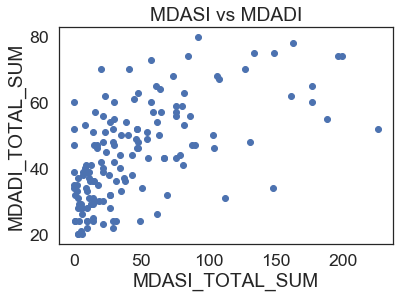

In [181]:
x = df_filtered['MDASI_TOTAL_SUM']
y = df_filtered['MDADI_TOTAL_SUM']
z = df_filtered['XQ_TOTAL_SUM']
plt.scatter(x,y)
plt.xlabel('MDASI_TOTAL_SUM')
plt.ylabel('MDADI_TOTAL_SUM')
plt.title('MDASI vs MDADI')

plt.show()

General positive correlation between MDADI and MDASI totals. Correlation is not very strong.

In [182]:
# Frequency histogram.
# Just use as example, not very informative unless all scores are normalized. 
# kwargs = dict(alpha=0.5, bins=100)
# plt.figure(figsize=(15,10))
# plt.hist(x, **kwargs, label='MDADI_TOTAL_SUM')
# plt.hist(y, **kwargs, label='MDASI_TOTAL_SUM')
# plt.hist(z, **kwargs, label='XQ_TOTAL_SUM')
# plt.gca().set(title='Frequency Histogram', xlabel = 'instrument Score', ylabel='Frequency');
# plt.legend()

In [183]:
# Normalized histogram
# Y-axis normalized. Just example, better if used for normalized scores.
# kwargs = dict(alpha=0.9, bins=100, density=True, stacked=True)
# plt.figure(figsize=(15,10))
# plt.hist(x, **kwargs, label='MDADI_TOTAL_SUM', color='r')
# plt.hist(y, **kwargs, label='MDASI_TOTAL_SUM', color='g')
# plt.hist(z, **kwargs, label='XQ_TOTAL_SUM', color='b')
# plt.gca().set(title='Normalized Frequency Histogram', xlabel = 'Score', ylabel='Frequency');
# plt.legend()

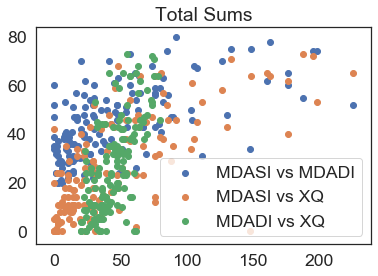

In [184]:
# plt.xlabel('MDASI_TOTAL_SUM')
# plt.ylabel('XQ_TOTAL_SUM')
plt.title('Total Sums')
plt.scatter(x,y, label='MDASI vs MDADI')
plt.scatter(x,z, label= 'MDASI vs XQ')
plt.scatter(y,z, label='MDADI vs XQ')
plt.legend()
plt.show()


MDADI vs XQ totals looks like stronger correlation. MDASI vs XQ weakest positive correlation. 

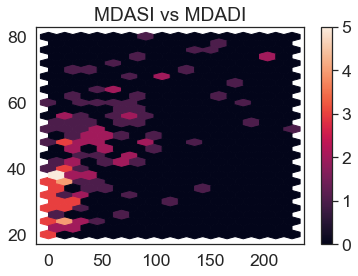

In [185]:
# Make the plot
plt.hexbin(x, y, gridsize=(15,15) )
plt.colorbar()
plt.title('MDASI vs MDADI')
plt.show()

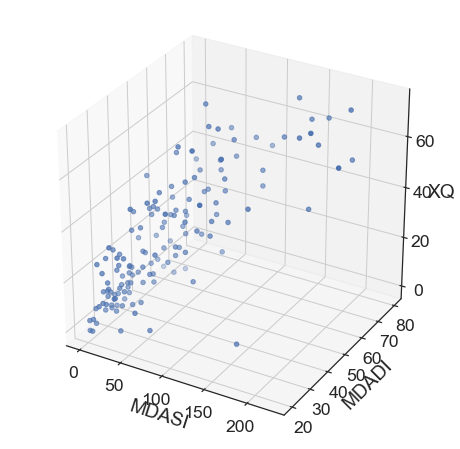

In [186]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x,y,z)
ax.set_xlabel('MDASI')
ax.set_ylabel('MDADI')
ax.set_zlabel('XQ')
plt.show()

General positive correlation between all three instrument totals. Most patients generally score higher on all if they've scored highly on one. 

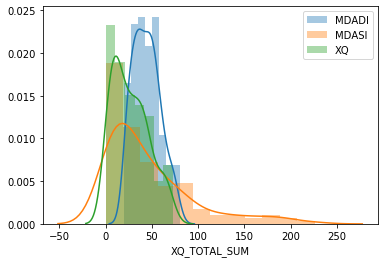

In [14]:
# plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['MDADI_TOTAL_SUM'], label='MDADI')
sns.distplot(df['MDASI_TOTAL_SUM'], label='MDASI')
sns.distplot(df['XQ_TOTAL_SUM'], label='XQ')
plt.legend()
plt.show()

General downward trend with most patients scoring low on instruments. Plot is not normalized so keep in mind that the maximum score on MDASI would be 280, MDADI 100, and XQ 80. Do not compare totals in chart above between instruments. 

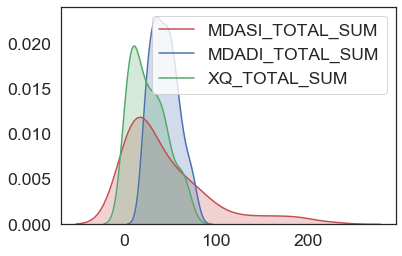

In [188]:
# Kernel Density Estimation histogram
# plt.figure(figsize=(15,10))
plt.tight_layout()
sns.kdeplot(x, shade=True, color = 'r')
sns.kdeplot(y, shade=True, color = 'b')
sns.kdeplot(z, shade=True, color = 'g')

### Playing around with linear regression

In [189]:
### TO DO #### DOUBLE CHECK. Make sure shape of dataframe is appropriate for regression algorithm. 
X = df_filtered['MDADI_TOTAL_SUM'].values.reshape(-1,1)
y = df_filtered['MDASI_TOTAL_SUM'].values.reshape(-1,1)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [191]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [192]:
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

[-42.94023942]
[[2.08296421]]


In [193]:
y_pred = regressor.predict(X_test)

In [194]:
df_ml = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})


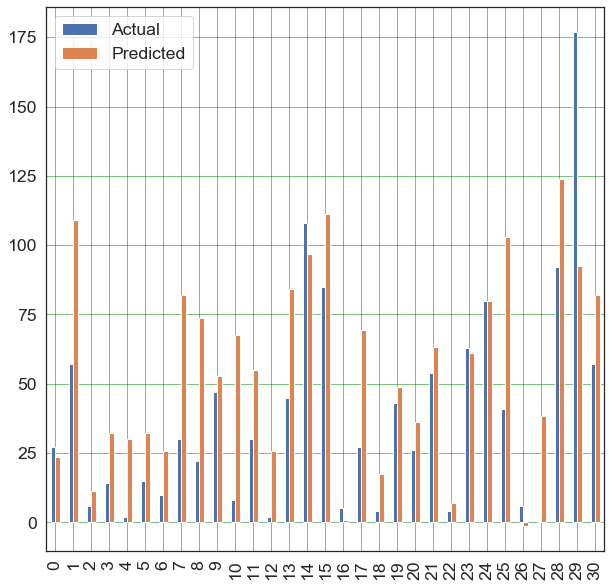

In [195]:
df1 = df_ml.head(50)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

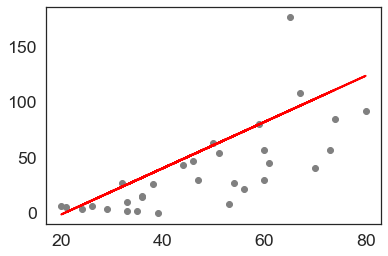

In [196]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [197]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 24.93670083567262
Mean Squared Error: 1072.8987264913014
Root Mean Squared Error: 32.755132826647205


In [198]:
# Grab all survey columns into 1 dataframe
survey_df = df_filtered.loc[:, 'MDASI1':]

In [199]:
survey_df.columns

Index(['MDASI1', 'MDASI2', 'MDASI3', 'MDASI4', 'MDASI5', 'MDASI6', 'MDASI7',
       'MDASI8', 'MDASI9', 'MDASI10', 'MDASI11', 'MDASI12', 'MDASI13',
       'MDASI14', 'MDASI15', 'MDASI16', 'MDASI17', 'MDASI18', 'MDASI19',
       'MDASI20', 'MDASI21', 'MDASI22', 'MDASI23', 'MDASI24', 'MDASI25',
       'MDASI26', 'MDASI27', 'MDASI28', 'MDASI_CORE_SUM', 'MDASI_CORE_AVE',
       'MDASI_HN_SUM', 'MDASI_HN_AVE', 'MDASI_INT_SUM', 'MDASI_INT_AVE',
       'MDASI_TOTAL_SUM', 'MDASI_TOTAL_AVE', 'MDADI1', 'MDADI2', 'MDADI3',
       'MDADI4', 'MDADI5', 'MDADI6', 'MDADI7', 'MDADI8', 'MDADI9', 'MDADI10',
       'MDADI11', 'MDADI12', 'MDADI13', 'MDADI14', 'MDADI15', 'MDADI16',
       'MDADI17', 'MDADI18', 'MDADI19', 'MDADI20', 'MDADI_E_SUM',
       'MDADI_E_AVE', 'MDADI_F_SUM', 'MDADI_F_AVE', 'MDADI_P_SUM',
       'MDADI_P_AVE', 'MDADI_TOTAL_SUM', 'MDADI_TOTAL_AVE', 'XQ1', 'XQ2',
       'XQ3', 'XQ4', 'XQ5', 'XQ6', 'XQ7', 'XQ8', 'XQ_EAT_SUM', 'XQ_EAT_AVE(',
       'XQ_NOTEAT_SUM', 'XQ_NOTEAT_AVE', 'XQ_T

In [200]:
# Take the category sum columns into a dataframe
category_sums = survey_df.loc[:, ['MDASI_CORE_SUM', 'MDASI_HN_SUM', 'MDASI_INT_SUM', 'MDADI_E_SUM', 
                               'MDADI_F_SUM', 'MDADI_P_SUM', 'XQ_EAT_SUM', 'XQ_NOTEAT_SUM']]

# Correlation Test Plots to Compare with '2020 Apr 29 (sw).docx'

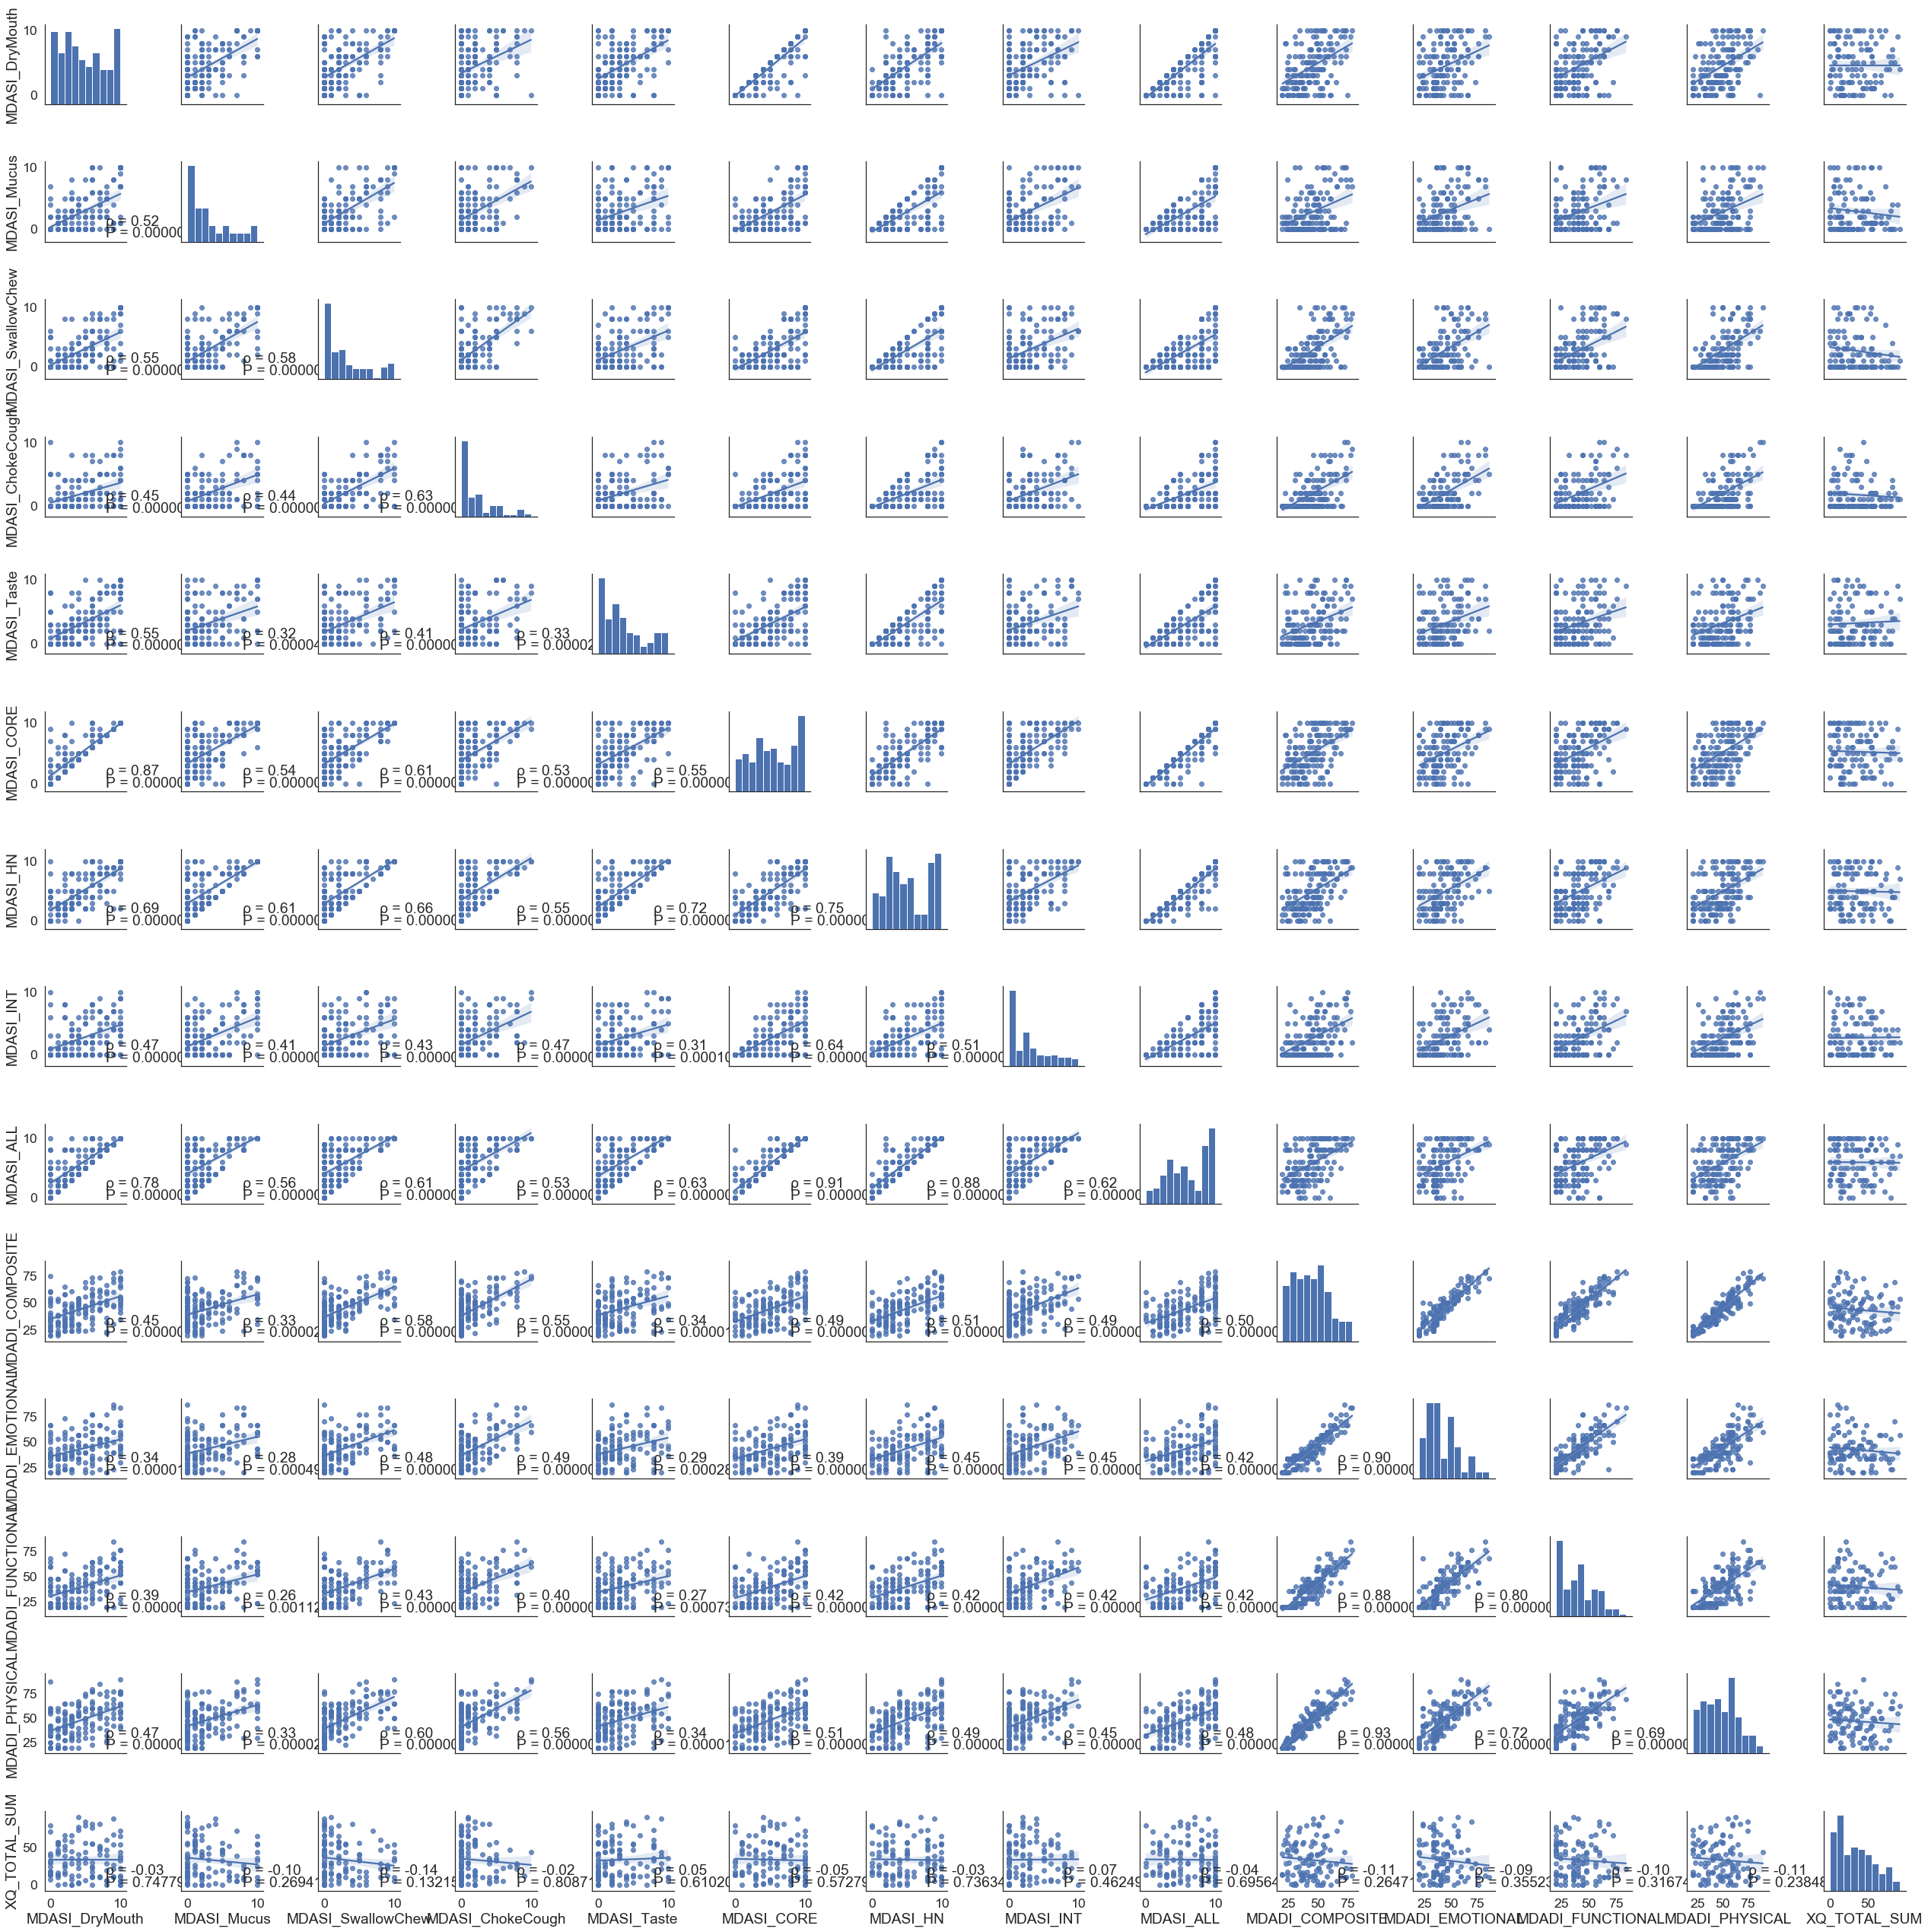

In [224]:
# Plot to check correlations against '2020 Apr 29 (sw).docx'

list = ['MDASI_DryMouth', 'MDASI_Mucus', 'MDASI_SwallowChew', 'MDASI_ChokeCough', 'MDASI_Taste', 'MDASI_CORE', 'MDASI_HN', 'MDASI_INT', 'MDASI_ALL',]
corr_check = pd.concat([MDASI_combined.loc[:,list], MDADI_norm.loc[:, 'MDADI_COMPOSITE':], XQ_norm['XQ_TOTAL_SUM']], axis=1 )

from scipy.stats import pearsonr, spearmanr #person linear, spearman non-linear. Spearman used in Tyler paper. 
g = sns.pairplot(corr_check, kind='reg', palette="Set2")
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the bottom right hand corner of a plot."""
    r, p = spearmanr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.75, .2), xycoords=ax.transAxes)
    ax.annotate(f'P = {p:.6f}', xy=(.75, .05), xycoords=ax.transAxes)
#     ax.annotate('p < 0.001', xy=(.1, .8), xycoords=ax.transAxes)

g.map_lower(corrfunc)
plt.show()

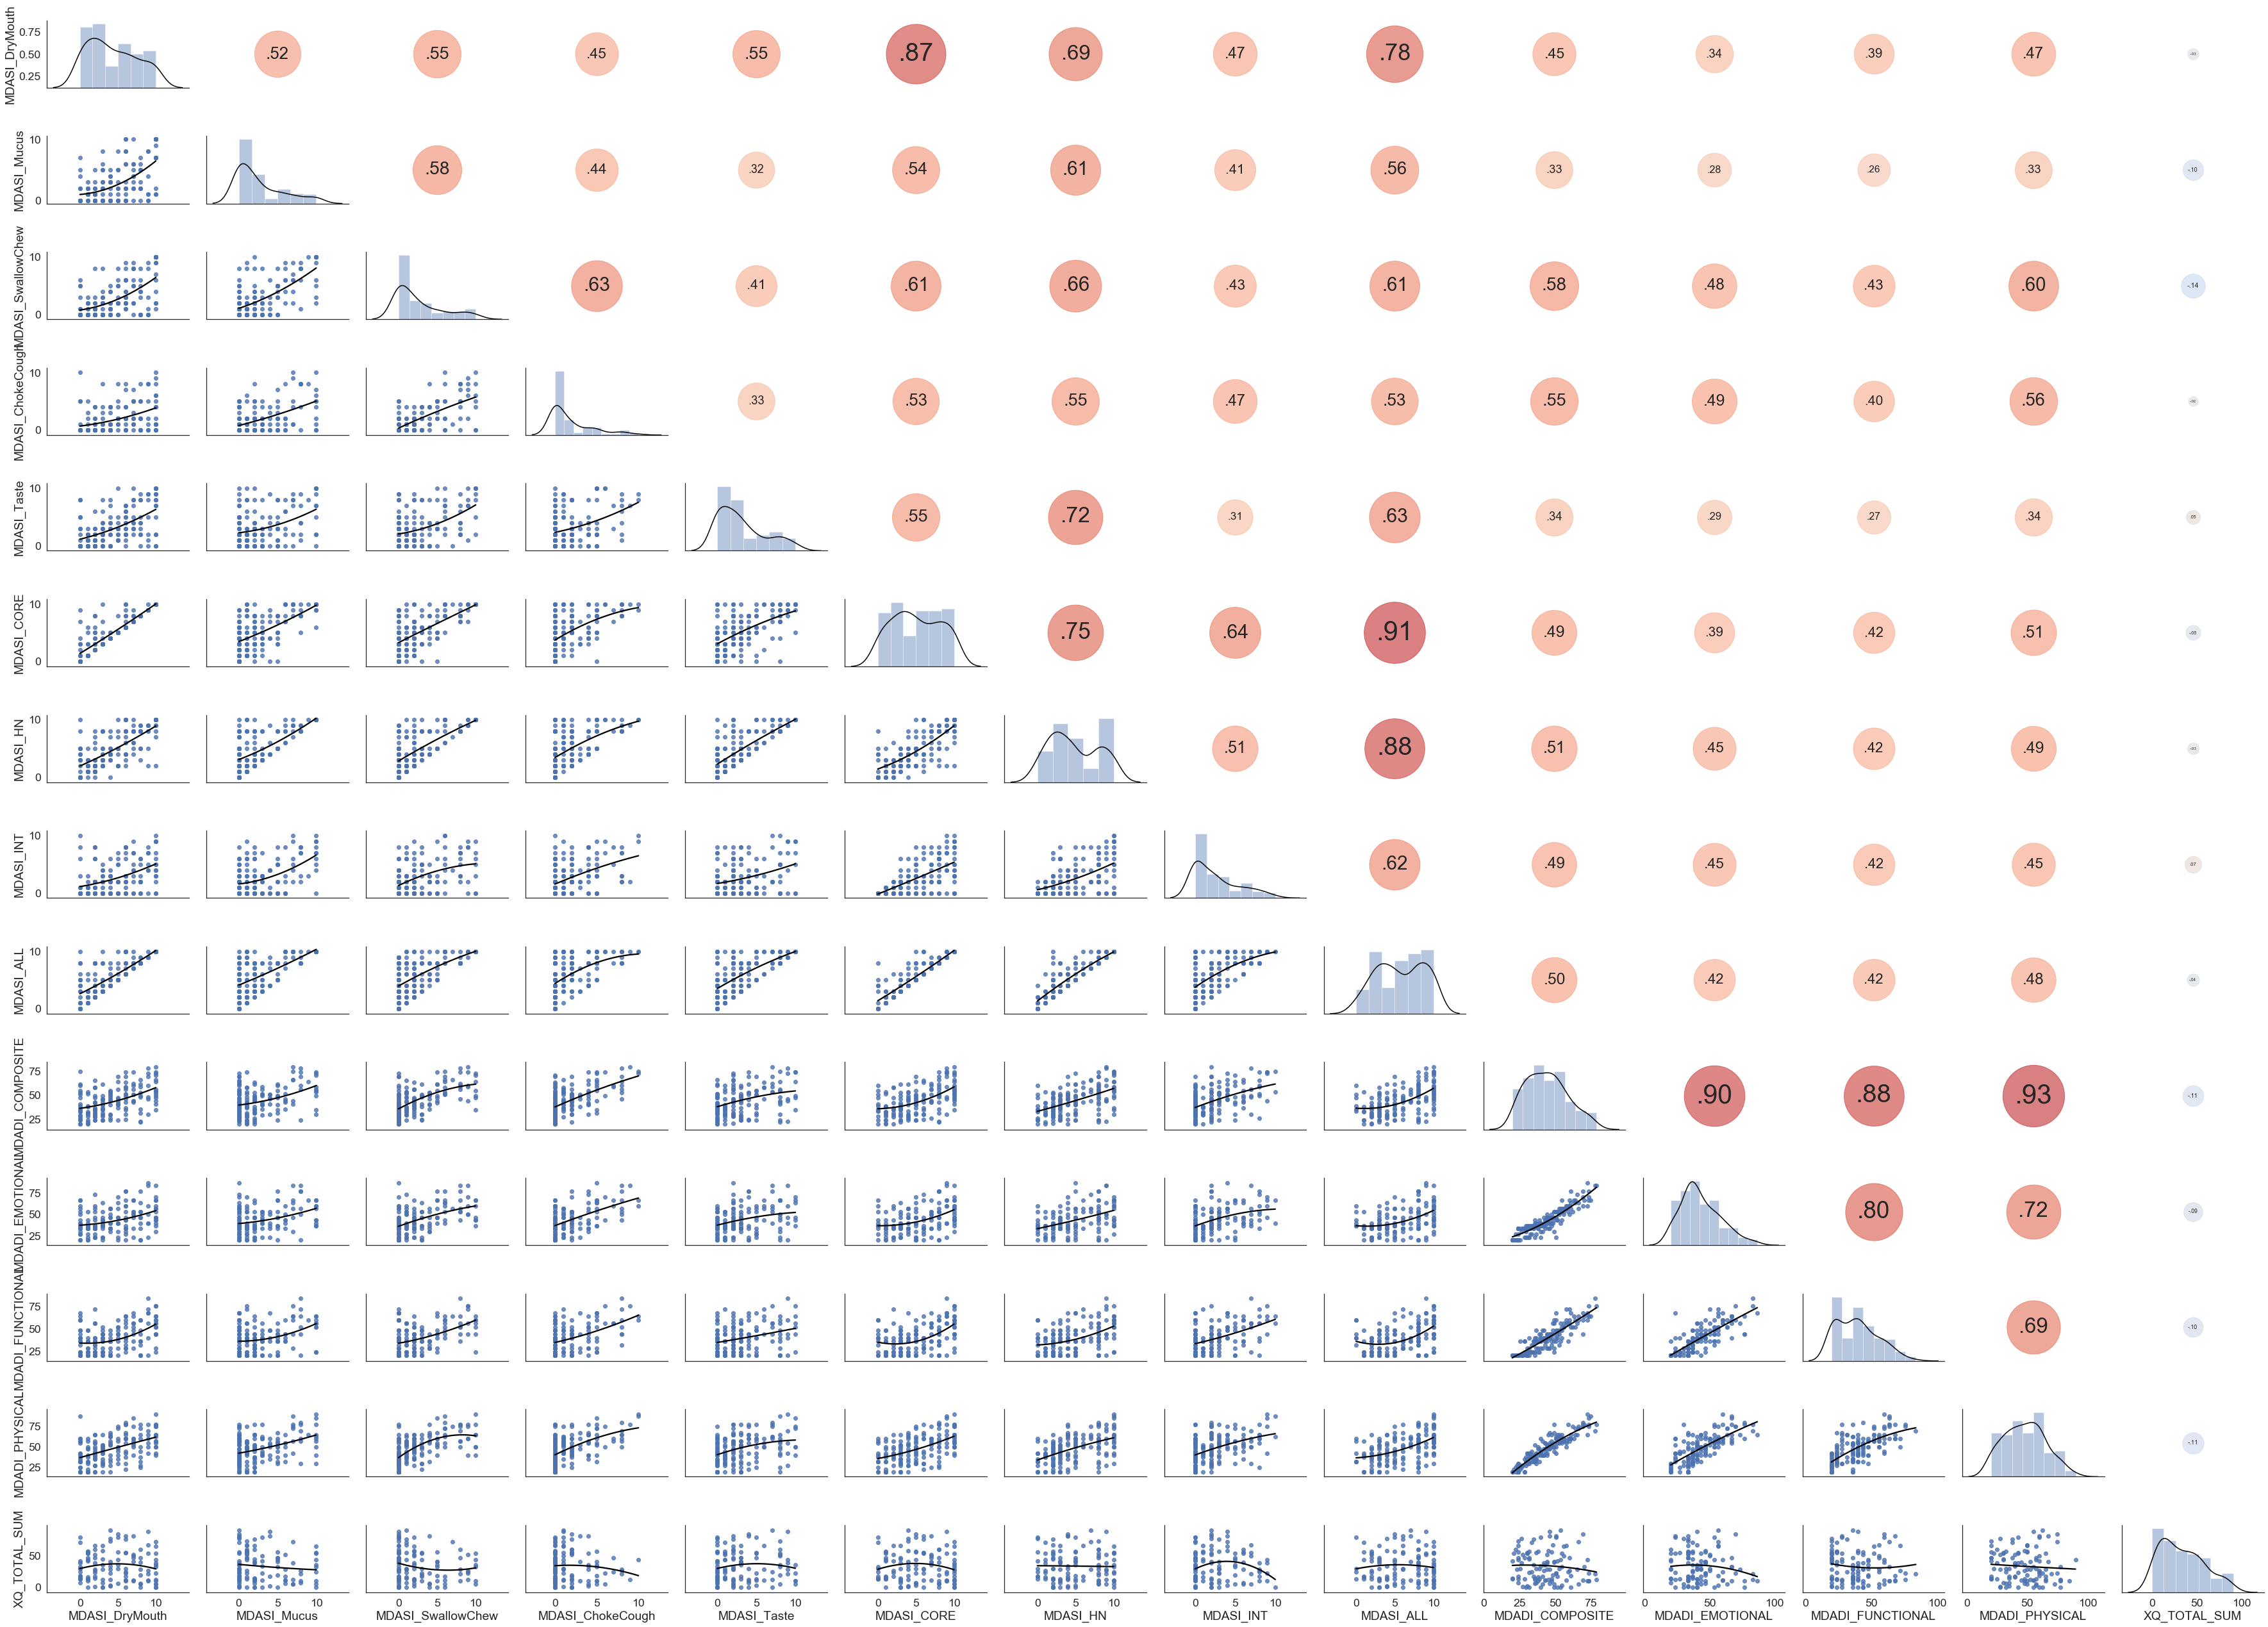

In [216]:
# Another comparison which is close to what is seen in '2020 Apr 29 (sw).docx'
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(corr_check, aspect=1.4, diag_sharey=False)
# g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_lower(sns.regplot, order=2, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

General trend of values matches '2020 Apr 29 (sw).docx' but cannot get the same values. Tried using raw data, normalized, spearman and person correlations.

# Individual item correlation
### MDASI vs MDADI

In [201]:
#MDASI vs MDADI
MDASIvMDADI = pd.concat([MDASI_combined.loc[:,'MDASI_Pain':'MDASI_EnjoyLife'], MDADI.loc[:,'MDADI1':'MDADI20']], axis=1)
MDASIvMDADI.columns

Index(['MDASI_Pain', 'MDASI_Fatigue', 'MDASI_Nausea', 'MDASI_Sleep',
       'MDASI_Distressed', 'MDASI_ShortBreath', 'MDASI_Remembering',
       'MDASI_Appetite', 'MDASI_Drowsy', 'MDASI_DryMouth', 'MDASI_Sad',
       'MDASI_Vomiting', 'MDASI_NumbTingling', 'MDASI_Mucus',
       'MDASI_SwallowChew', 'MDASI_ChokeCough', 'MDASI_VoiceSpeech',
       'MDASI_SkinRash', 'MDASI_Constipation', 'MDASI_Taste',
       'MDASI_MouthSores', 'MDASI_TeethGums', 'MDASI_Activity', 'MDASI_Mood',
       'MDASI_Work', 'MDASI_Relationships', 'MDASI_Walking', 'MDASI_EnjoyLife',
       'MDADI1', 'MDADI2', 'MDADI3', 'MDADI4', 'MDADI5', 'MDADI6', 'MDADI7',
       'MDADI8', 'MDADI9', 'MDADI10', 'MDADI11', 'MDADI12', 'MDADI13',
       'MDADI14', 'MDADI15', 'MDADI16', 'MDADI17', 'MDADI18', 'MDADI19',
       'MDADI20'],
      dtype='object')

In [202]:
MDASIvMDADI.head()

MDASI_Pain  MDASI_Fatigue  MDASI_Nausea  MDASI_Sleep  MDASI_Distressed  \
0         0.0            1.0           0.0          0.0               0.0   
1         0.0            7.0           0.0          0.0               0.0   
2         0.0            0.0           0.0          0.0               0.0   
3         0.0            2.0           0.0          0.0               0.0   
4         0.0            0.0           0.0          0.0               0.0   

   MDASI_ShortBreath  MDASI_Remembering  MDASI_Appetite  MDASI_Drowsy  \
0                0.0                0.0             0.0           0.0   
1                5.0                2.0             5.0           5.0   
2                0.0                0.0             0.0           0.0   
3                0.0                2.0             0.0           0.0   
4                0.0                0.0             0.0           0.0   

   MDASI_DryMouth  MDASI_Sad  MDASI_Vomiting  MDASI_NumbTingling  MDASI_Mucus  \
0             4.0        0.0             0.0                 0.0          4.0   
1             0.0        0.0             0.0                 4.0          2.0   
2             4.0        0.0             0.0                 0.0          4.0   
3             2.0        0.0             0.0                 1.0          1.0   
4             0.0        0.0             0.0                 0.0          0.0   

   MDASI_SwallowChew  MDASI_ChokeCough  MDASI_VoiceSpeech  MDASI_SkinRash  \
0                1.0               0.0                0.0             0.0   
1                0.0               0.0                0.0             0.0   
2                2.0               4.0                0.0             0.0   
3                0.0               0.0                0.0             0.0   
4                0.0               0.0                0.0             0.0   

   MDASI_Constipation  MDASI_Taste  MDASI_MouthSores  MDASI_TeethGums  \
0                 0.0          3.0               2.0              0.0   
1                 0.0          3.0               0.0              0.0   
2                 0.0          2.0               0.0              0.0   
3                 0.0          0.0               0.0              0.0   
4                 0.0          5.0               0.0              5.0   

   MDASI_Activity  MDASI_Mood  MDASI_Work  MDASI_Relationships  MDASI_Walking  \
0             1.0         0.0         0.0                  0.0            0.0   
1             8.0         6.0         8.0                  0.0            7.0   
2             0.0         0.0         0.0                  0.0            0.0   
3             0.0         1.0         1.0                  0.0            2.0   
4             0.0         0.0         0.0                  0.0            0.0   

   MDASI_EnjoyLife  MDADI1  MDADI2  MDADI3  MDADI4  MDADI5  MDADI6  MDADI7  \
0              1.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1              0.0     2.0     1.0     2.0     1.0     5.0     4.0     2.0   
2              0.0     1.0     1.0     1.0     1.0     5.0     1.0     1.0   
3              1.0     1.0     1.0     1.0     2.0     5.0     1.0     1.0   
4              0.0     1.0     2.0     2.0     2.0     2.0     2.0     2.0   

   MDADI8  MDADI9  MDADI10  MDADI11  MDADI12  MDADI13  MDADI14  MDADI15  \
0     NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1     1.0     1.0      4.0      4.0      2.0      1.0      2.0      3.0   
2     1.0     1.0      1.0      1.0      1.0      1.0      1.0      1.0   
3     1.0     1.0      1.0      1.0      1.0      2.0      1.0      1.0   
4     2.0     2.0      3.0      4.0      1.0      2.0      2.0      2.0   

   MDADI16  MDADI17  MDADI18  MDADI19  MDADI20  
0      NaN      NaN      NaN      NaN      NaN  
1      4.0      4.0      2.0      1.0      1.0  
2      1.0      3.0      1.0      1.0      1.0  
3      1.0      1.0      1.0      5.0      1.0  
4      2.0      2.0      2.0      2.0      2.0

In [203]:
# # Full MDASI vs MDADI correlation matrix
# ############ This takes a really long time to run so the figre is saved to 'MDASIvsMDADI.png' and this code is commented out###############

# from scipy.stats import pearsonr, spearmanr #person linear, spearman non-linear. Spearman used in Tyler paper. 
# g = sns.pairplot(MDASIvMDADI, kind='reg', palette="Set2")
# def corrfunc(x,y, ax=None, **kws):
#     """Plot the correlation coefficient in the bottom right hand corner of a plot."""
#     r, p = spearmanr(x, y)
#     ax = ax or plt.gca()
#     # Unicode for lowercase rho (ρ)
#     rho = '\u03C1'
#     ax.annotate(f'{rho} = {r:.2f}', xy=(.75, .15), xycoords=ax.transAxes)
#     ax.annotate(f'P = {p:.6f}', xy=(.75, .05), xycoords=ax.transAxes)
# #     ax.annotate('p < 0.001', xy=(.1, .8), xycoords=ax.transAxes)

# g.map_lower(corrfunc)
# plt.savefig('MDASIvsMDADI.png')
# # plt.show()

In [204]:
######## 1-sided correlation matrix from DataQuest mission ################
# import matplotlib.pyplot as plt
# import seaborn as sns

# def plot_null_correlations(df):
#     # create a correlation matrix only for columns with at least
#     # one missing value
#     cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
#     missing_corr = df[cols_with_missing_vals].isnull().corr()
    
#     # create a triangular mask to avoid repeated values and make
#     # the plot easier to read
#     missing_corr = missing_corr.iloc[1:, :-1]
#     mask = np.triu(np.ones_like(missing_corr), k=1)
    
#     # plot a heatmap of the values
#     plt.figure(figsize=(20,14))
#     ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
#                      cmap='RdBu', mask=mask, annot=True)
    
#     # format the text in the plot to make it easier to read
#     for text in ax.texts:
#         t = float(text.get_text())
#         if -0.05 < t < 0.01:
#             text.set_text('')
#         else:
#             text.set_text(round(t, 2))
#         text.set_fontsize('x-large')
#     plt.xticks(rotation=90, size='x-large')
#     plt.yticks(rotation=0, size='x-large')

#     plt.show()
    
# # killed_cols = [col for col in mvc.columns if 'killed' in col]   
# veh_cols = [col for col in mvc.columns if 'vehicle' in col]

# plot_null_correlations(mvc[veh_cols])

In [205]:
# Get a list of correlations in MDASIvsMDADI, convert to upper triangular, removing redundant values.
MSIvMDI_corr = MDASIvMDADI.corr(method='spearman').round(3)
MSIvMDI_corr = MSIvMDI_corr.mask(np.triu(np.ones(MSIvMDI_corr.shape)).astype(np.bool))
MSIvMDI_corr

MDASI_Pain  MDASI_Fatigue  MDASI_Nausea  MDASI_Sleep  \
MDASI_Pain                  NaN            NaN           NaN          NaN   
MDASI_Fatigue             0.527            NaN           NaN          NaN   
MDASI_Nausea              0.437          0.433           NaN          NaN   
MDASI_Sleep               0.534          0.709         0.440          NaN   
MDASI_Distressed          0.634          0.641         0.489        0.674   
MDASI_ShortBreath         0.354          0.541         0.356        0.441   
MDASI_Remembering         0.499          0.604         0.291        0.476   
MDASI_Appetite            0.463          0.487         0.561        0.453   
MDASI_Drowsy              0.501          0.754         0.464        0.652   
MDASI_DryMouth            0.461          0.520         0.399        0.500   
MDASI_Sad                 0.528          0.540         0.434        0.471   
MDASI_Vomiting            0.300          0.402         0.604        0.406   
MDASI_NumbTingling        0.362          0.416         0.253        0.430   
MDASI_Mucus               0.399          0.537         0.362        0.488   
MDASI_SwallowChew         0.493          0.610         0.321        0.575   
MDASI_ChokeCough          0.420          0.510         0.309        0.431   
MDASI_VoiceSpeech         0.409          0.467         0.370        0.436   
MDASI_SkinRash            0.405          0.450         0.464        0.450   
MDASI_Constipation        0.370          0.381         0.370        0.398   
MDASI_Taste               0.389          0.354         0.379        0.382   
MDASI_MouthSores          0.489          0.336         0.478        0.253   
MDASI_TeethGums           0.406          0.450         0.325        0.438   
MDASI_Activity            0.496          0.667         0.341        0.546   
MDASI_Mood                0.492          0.603         0.390        0.582   
MDASI_Work                0.450          0.626         0.315        0.602   
MDASI_Relationships       0.501          0.524         0.329        0.497   
MDASI_Walking             0.504          0.619         0.305        0.559   
MDASI_EnjoyLife           0.570          0.516         0.344        0.525   
MDADI1                   -0.074          0.013        -0.125        0.065   
MDADI2                    0.102          0.054        -0.011        0.127   
MDADI3                    0.050          0.024        -0.091        0.125   
MDADI4                   -0.147         -0.017        -0.044        0.102   
MDADI5                   -0.088         -0.015         0.053       -0.052   
MDADI6                   -0.066         -0.091        -0.124       -0.055   
MDADI7                   -0.058         -0.068        -0.099       -0.027   
MDADI8                    0.127          0.094        -0.008        0.217   
MDADI9                    0.153          0.113         0.084        0.247   
MDADI10                  -0.083         -0.069        -0.115       -0.096   
MDADI11                  -0.048          0.058        -0.090        0.116   
MDADI12                   0.015          0.037        -0.010        0.089   
MDADI13                   0.041         -0.036        -0.082        0.026   
MDADI14                   0.071          0.052        -0.011        0.129   
MDADI15                   0.001          0.122         0.021        0.127   
MDADI16                  -0.112         -0.119        -0.139       -0.146   
MDADI17                  -0.036         -0.105        -0.053       -0.063   
MDADI18                   0.052         -0.045        -0.072        0.021   
MDADI19                  -0.063         -0.067        -0.039       -0.003   
MDADI20                   0.067         -0.003        -0.055        0.045   

                     MDASI_Distressed  MDASI_ShortBreath  MDASI_Remembering  \
MDASI_Pain                        NaN                NaN                NaN   
MDASI_Fatigue                     NaN                NaN                NaN   
MDASI_Naus

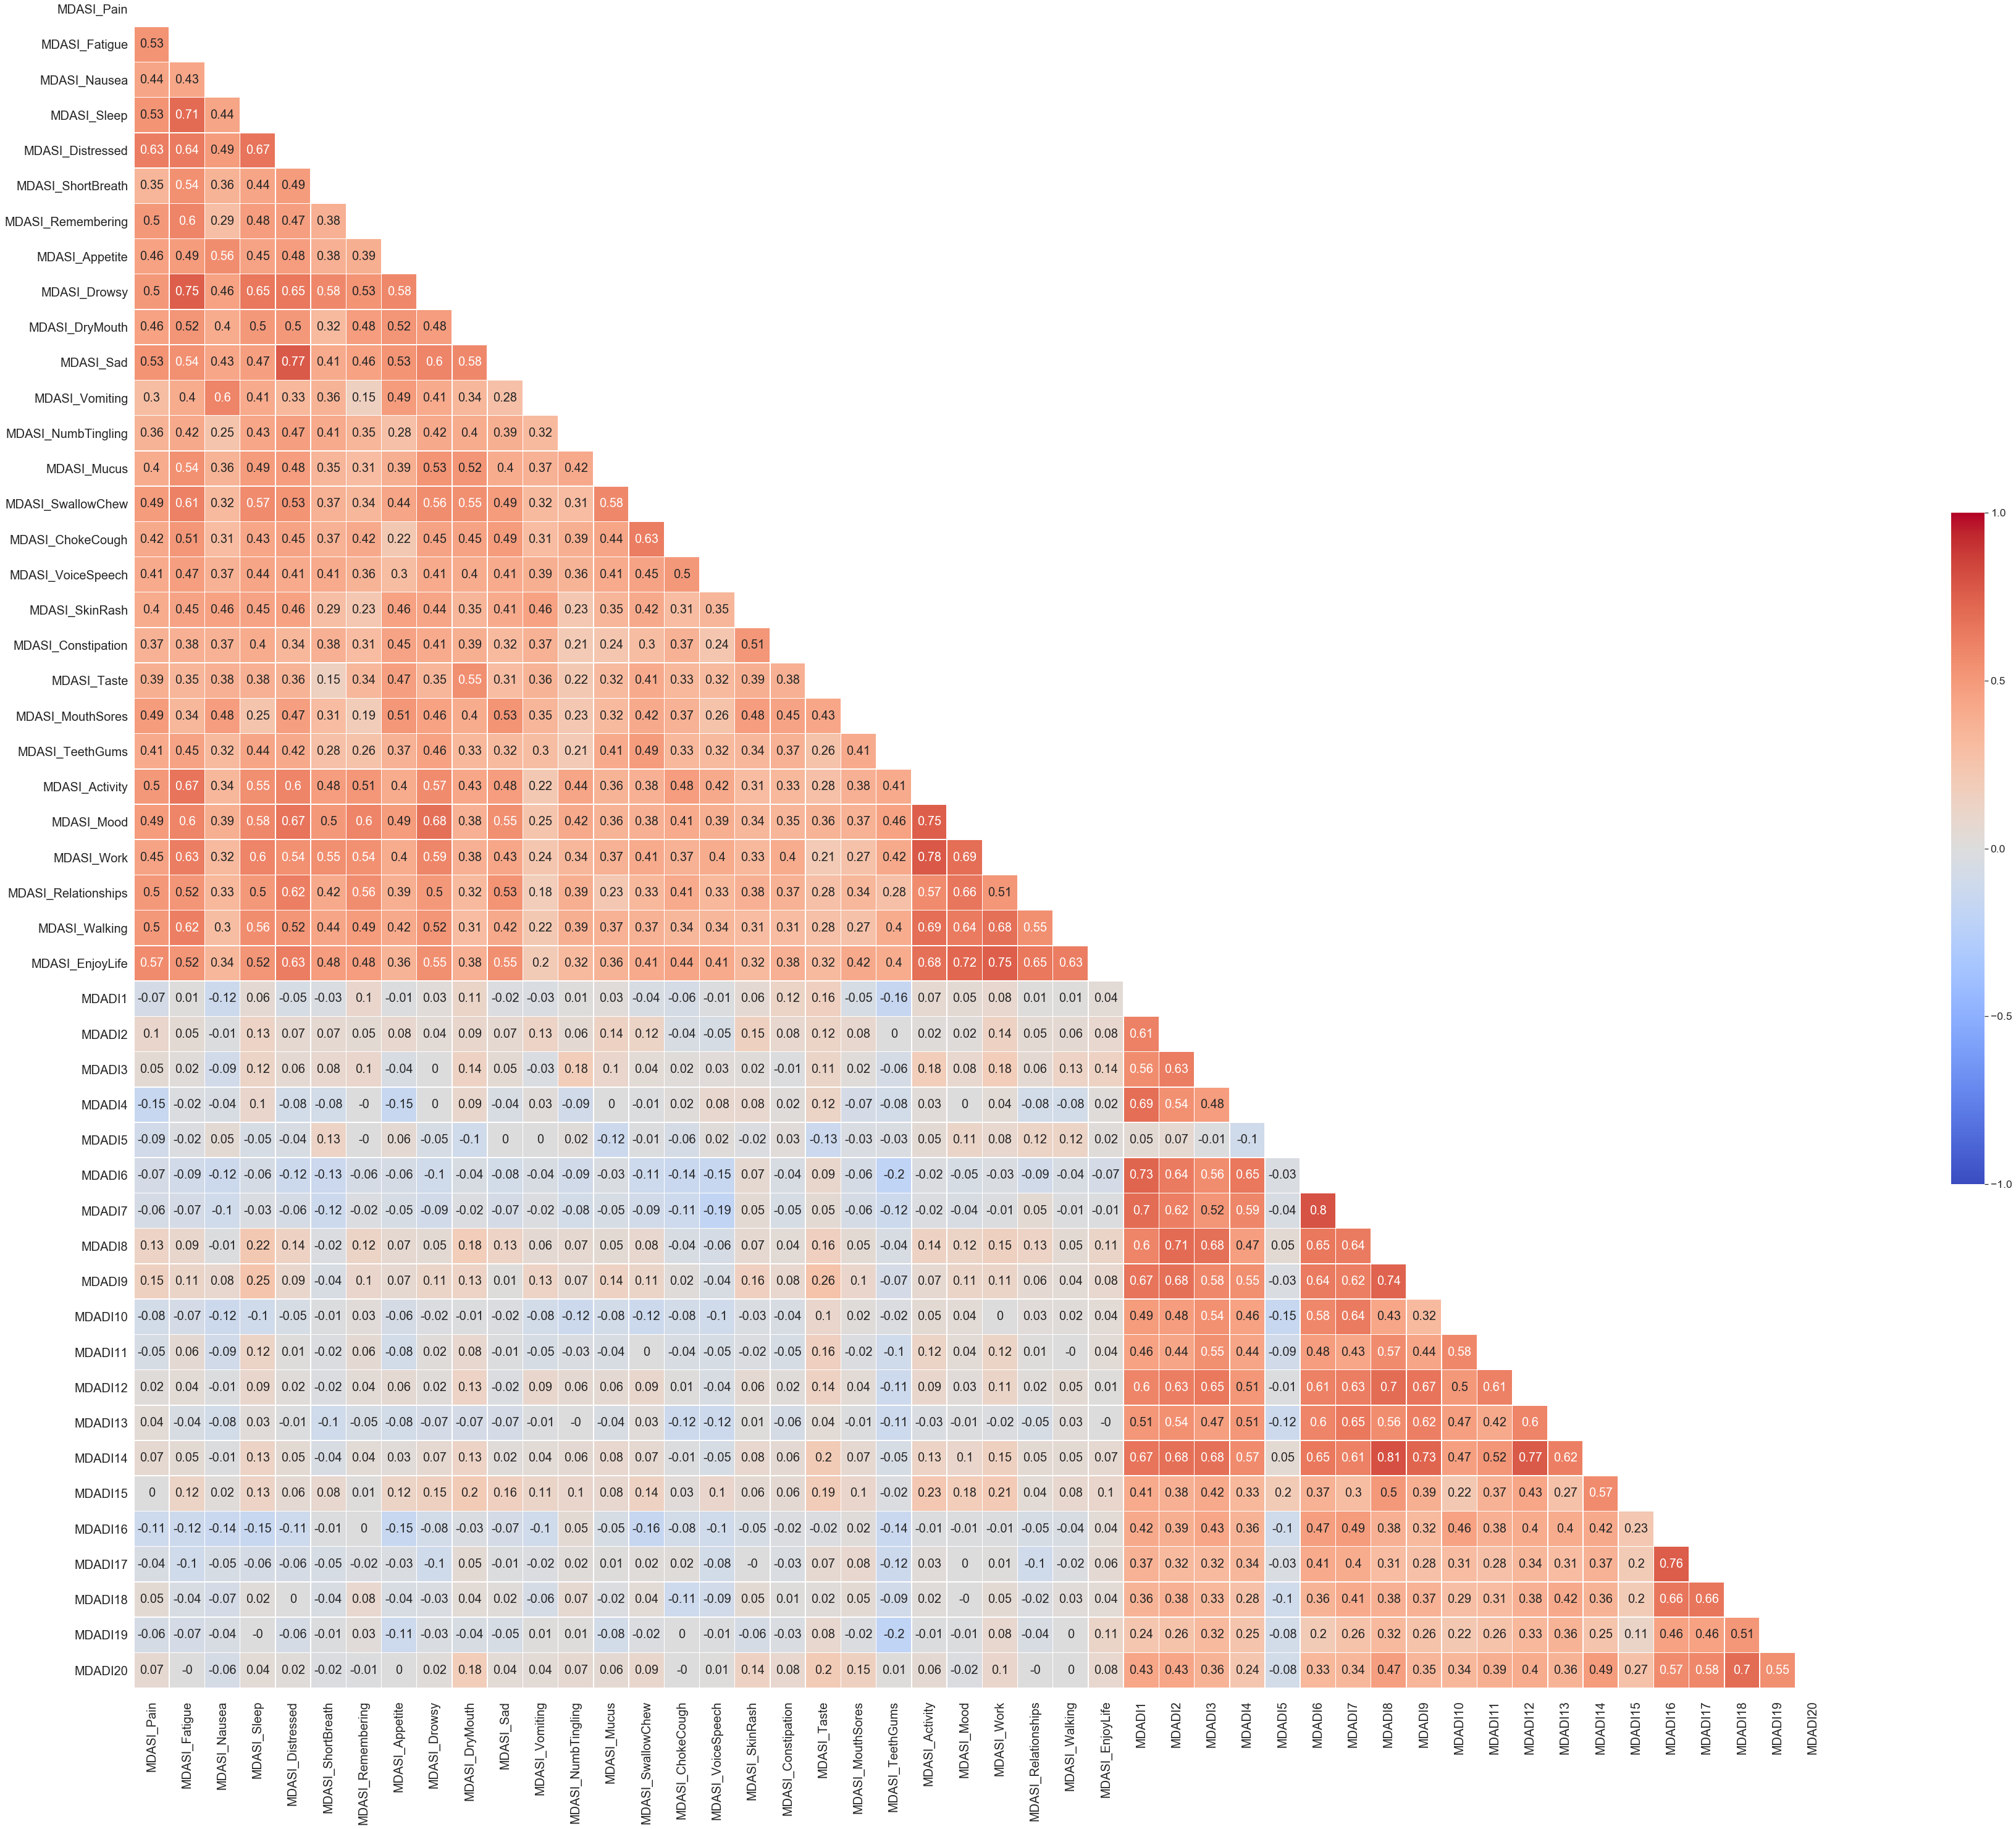

In [206]:
# Plot correlation matrix with heatmap
fig, ax = plt.subplots(figsize=(70, 50))

heatmap = sns.heatmap(MSIvMDI_corr.round(2),
                      square = True,
                      linewidths = .5,
                      cmap ='coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 20})

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Add the column names as labels and change size.
ax.set_yticklabels(MSIvMDI_corr.columns, rotation = 0, size=20)
ax.set_xticklabels(MSIvMDI_corr.columns, size=20)
ax.tick_params(axis='x', which='major', pad=15)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Individual items on MDADI and MDASI do not correlate. MDADI5, 'I do not feel self-conscious when I eat,' is framed differently than the other questions (other than MDADI15). Figure above suggests that many patients answered quickly and were not conscious of this reversed wording. <br>
One would expect some questions to have strong correlation since there is correlation between categorical scores. Particularily MDASI15 (Your difficulty swallowing/chewing at its WORST) vs MDADI7 (P6. Swallowing takes great effort). Tried changing MDADI scale to 1-10 but same results. 

In [27]:
# Sort the correlation matrix highest to lowest only keeping values >= 0.5
cm = MSIvMDI_corr[abs(MSIvMDI_corr) >= 0.5].stack().reset_index()
cm.sort_values(by=[0], ascending=False)

NameError: name 'MSIvMDI_corr' is not defined

In [19]:
## Trying using individual MDASI and normalized MDADI categories. 
MDASI_MDADINorm = pd.concat([MDASI_combined.loc[:,'MDASI_Pain':'MDASI_EnjoyLife'], MDADI_norm], axis=1 )
MDASI_MDADINorm = MDASI_MDADINorm.corr(method='spearman').round(3)
MDASI_MDADINorm = MDASI_MDADINorm.mask(np.triu(np.ones(MDASI_MDADINorm.shape)).astype(np.bool))

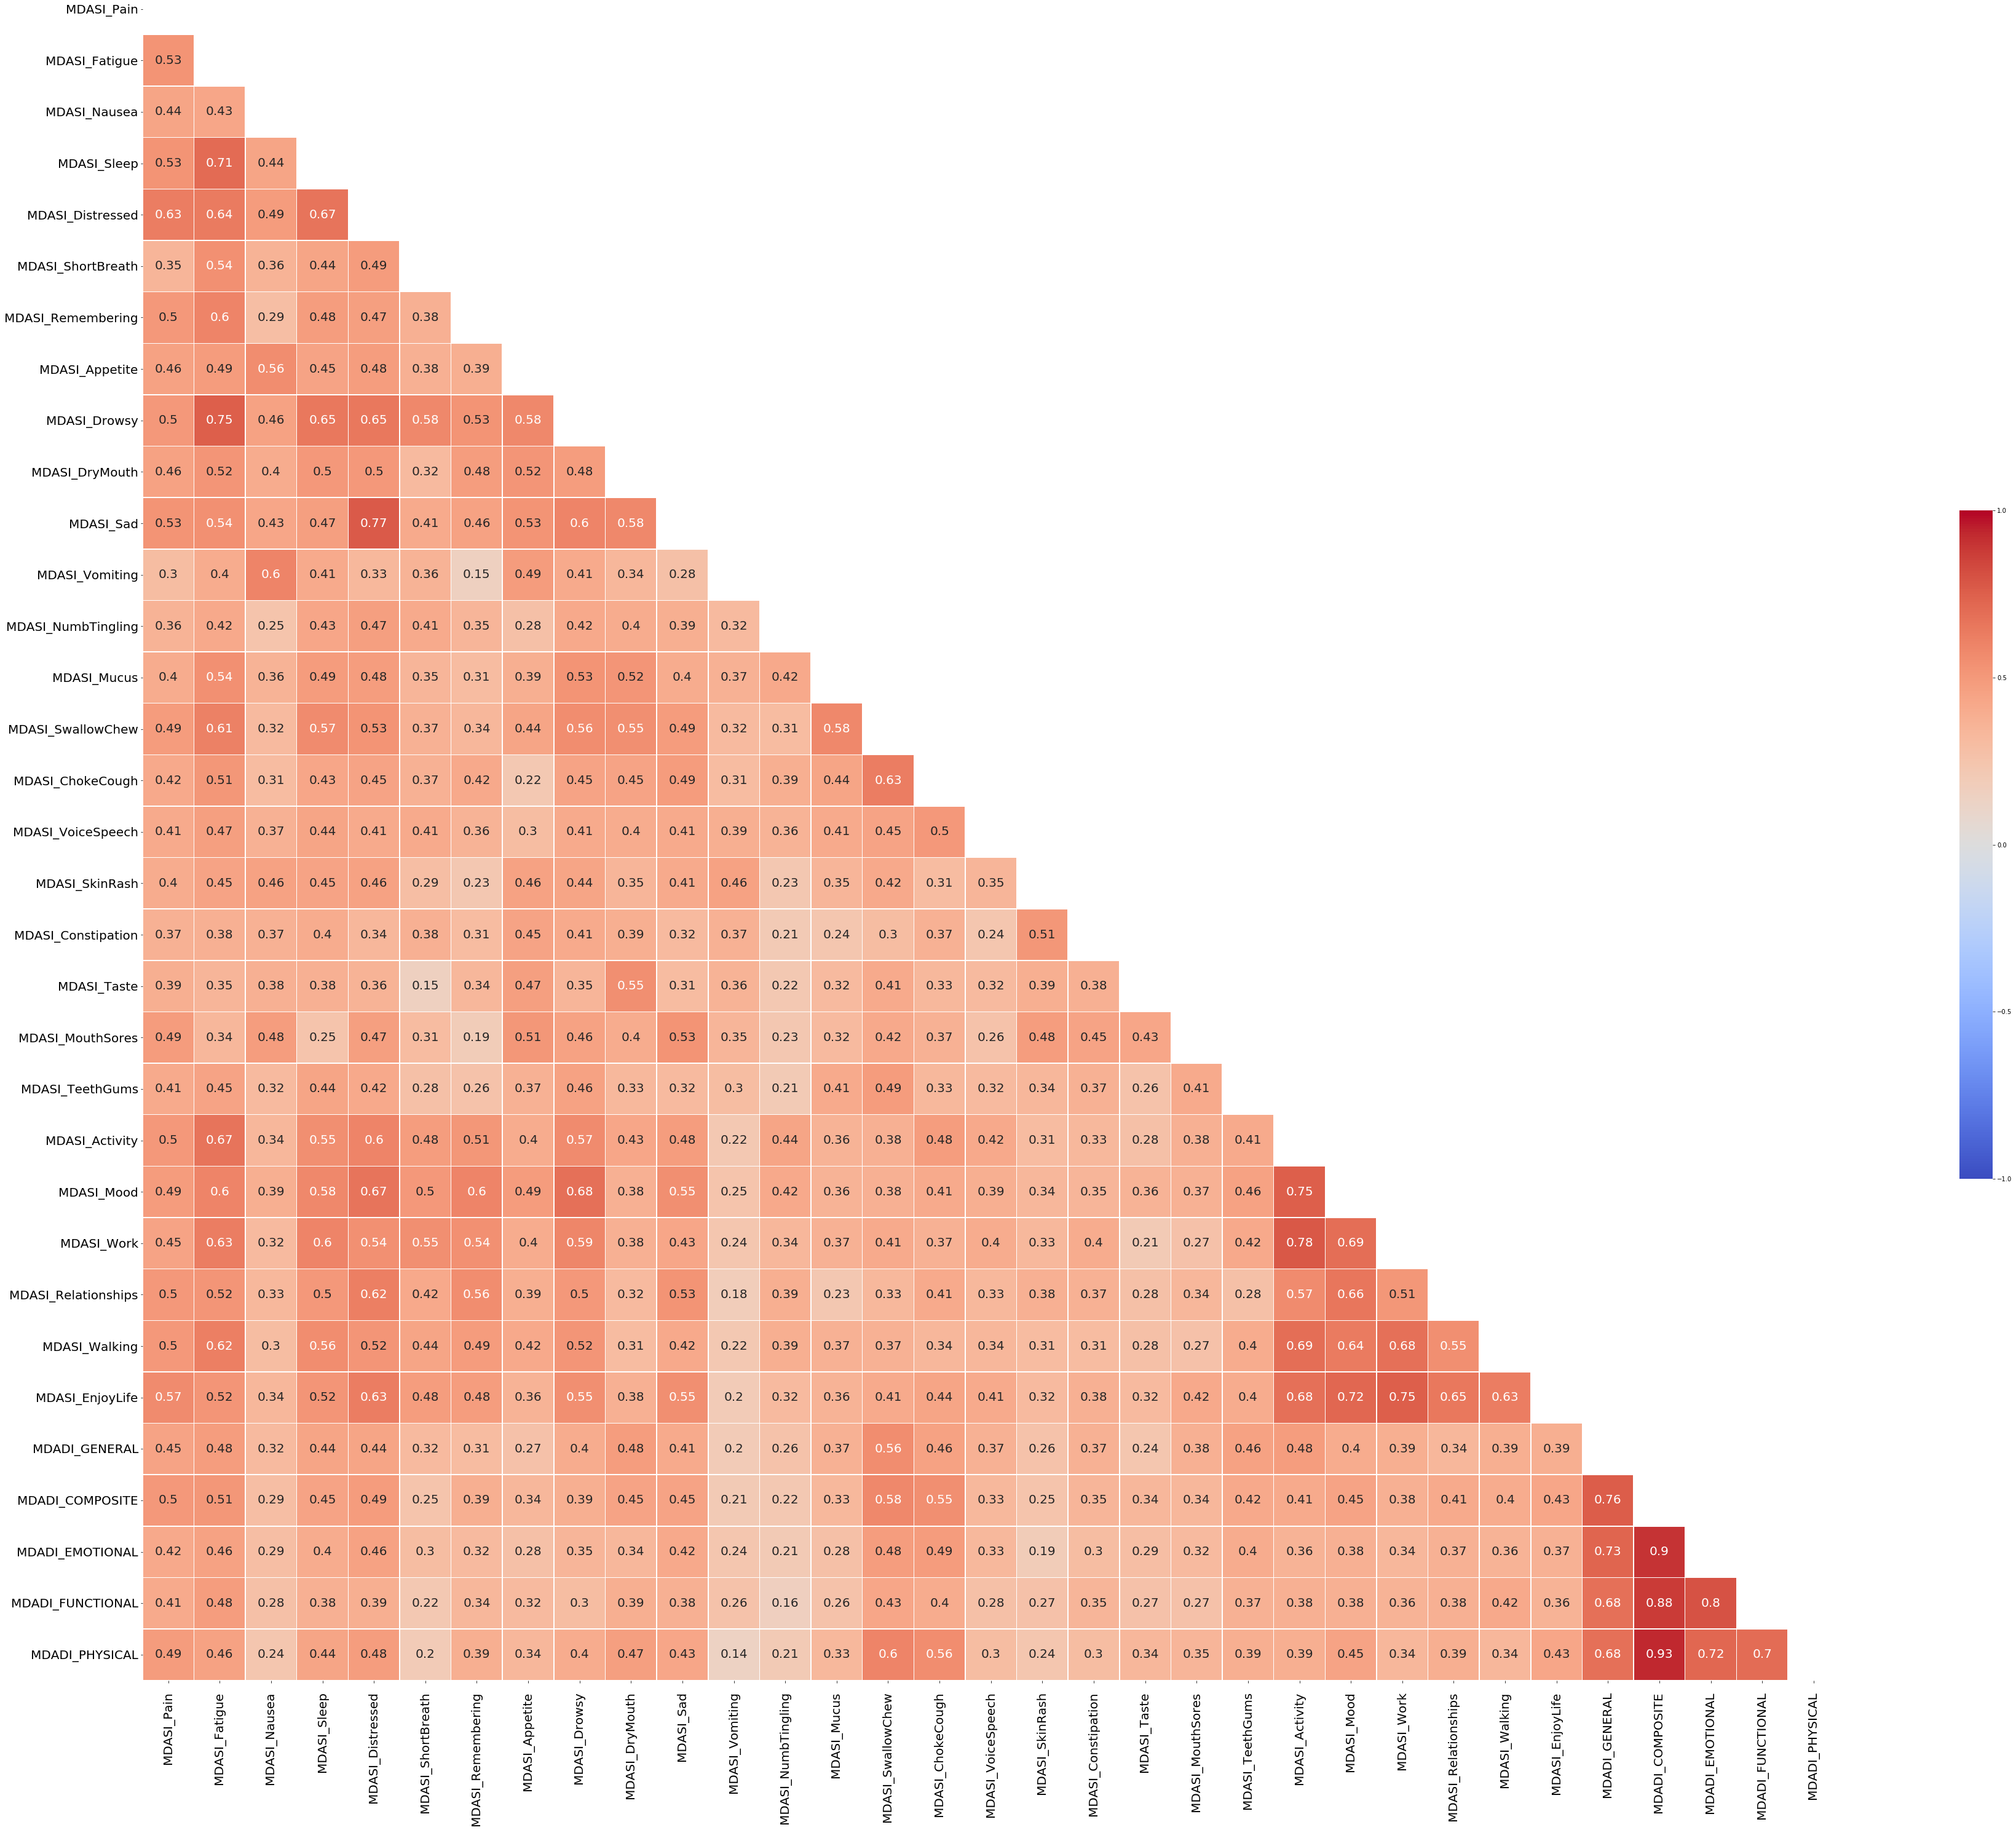

In [20]:
# Plot MDASI and MDADI_norm in correlation heatmap
fig, ax = plt.subplots(figsize=(70, 50))

heatmap = sns.heatmap(MDASI_MDADINorm.round(2),
                      square = True,
                      linewidths = .5,
                      cmap ='coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 20})

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Add the column names as labels and change size.
ax.set_yticklabels(MDASI_MDADINorm.columns, rotation = 0, size=20)
ax.set_xticklabels(MDASI_MDADINorm.columns, size=20)
ax.tick_params(axis='x', which='major', pad=15)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [25]:
# Convert MDADI scores from 1-5 to 1-10
# MDADI scores converted to 1-10 by multiplying original scores 1-5 by 2. Note that the lowest possible score would be 2 after conversion. 
def convert_to10(item):
    return item*2
MDADI_to10 = MDADI.loc[:,'MDADI1':'MDADI20'].applymap(convert_to10)
## Trying using individual MDASI and normalized MDADI categories. 
MDASI_MDADIto10 = pd.concat([MDASI_combined.loc[:,'MDASI_Pain':'MDASI_EnjoyLife'], MDADI_to10], axis=1 )
MDASI_MDADIto10 = MDASI_MDADIto10.corr(method='spearman').round(3)
MDASI_MDADIto10 = MDASI_MDADIto10.mask(np.triu(np.ones(MDASI_MDADIto10.shape)).astype(np.bool))

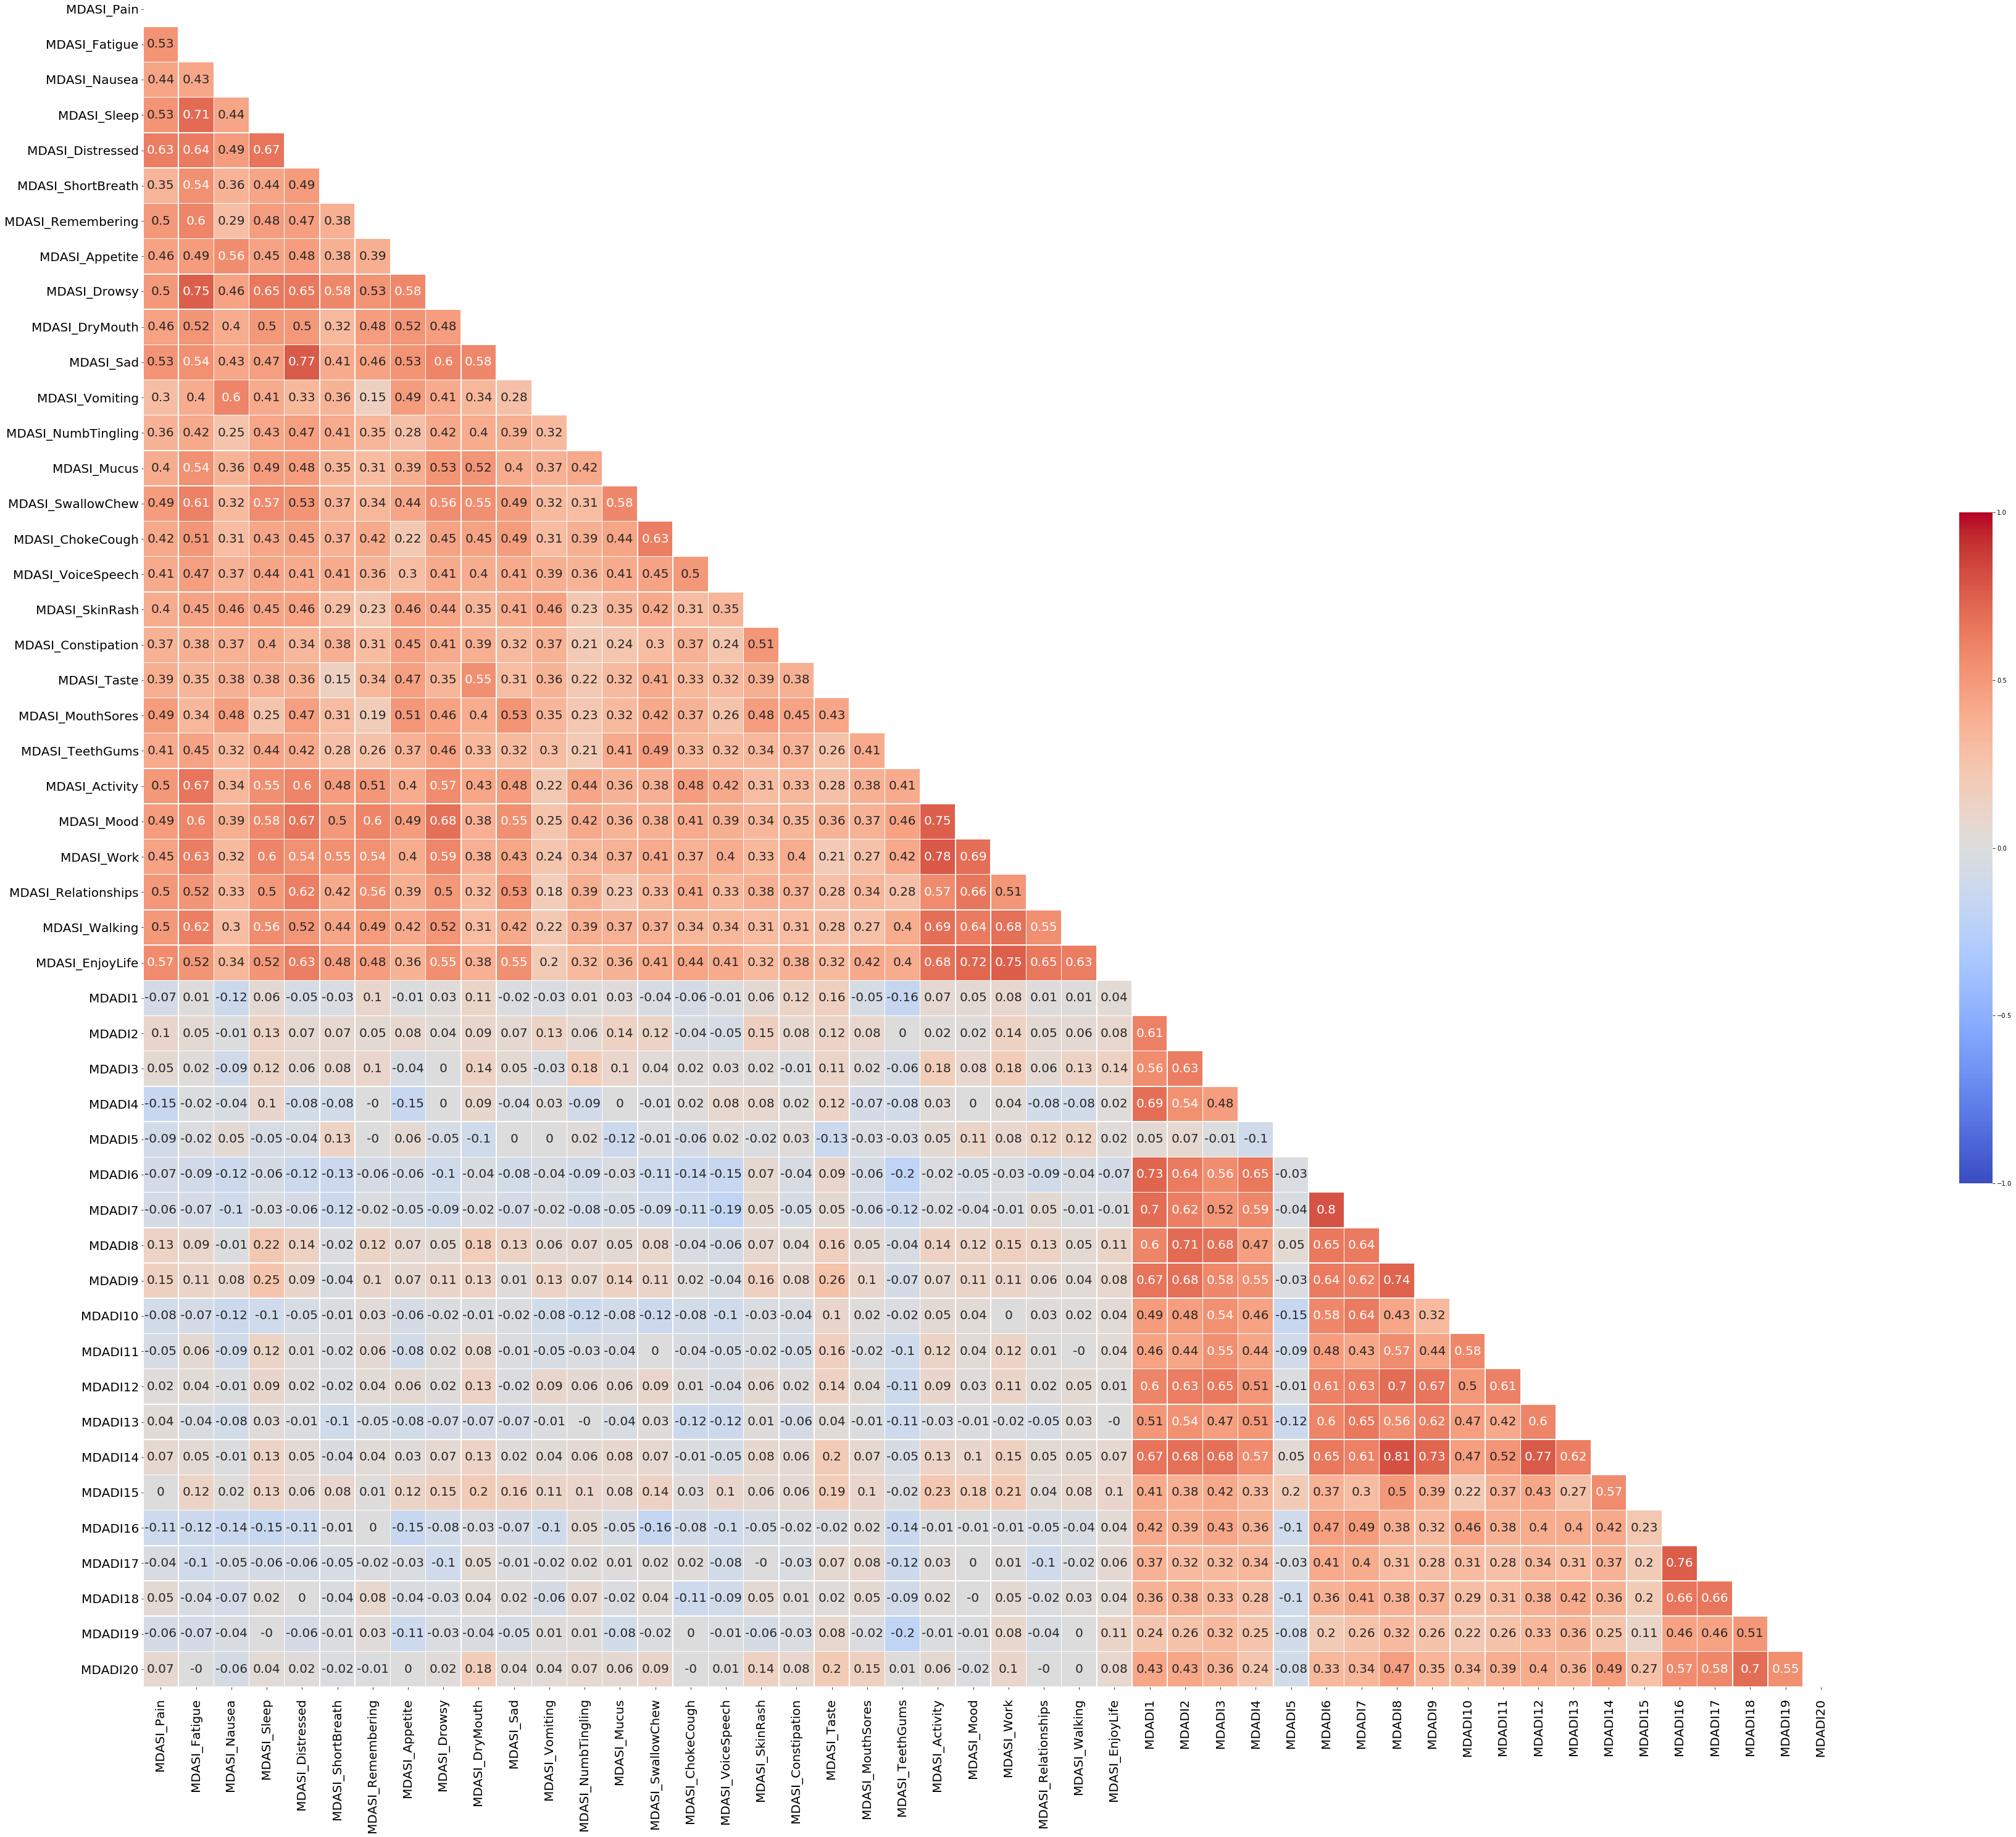

In [26]:
# Generate heat plot of correlation between individual MDASI items and MDADI items which have been converted to a 1-10 scale by doubling the original score. 
# This is to check the unexpected correlation plot of MDASIvsMDADI, and see if MDADI being scored 1-5 rather than 1-10 was the issue. 
fig, ax = plt.subplots(figsize=(70, 50))

heatmap = sns.heatmap(MDASI_MDADIto10.round(2),
                      square = True,
                      linewidths = .5,
                      cmap ='coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 20})

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Add the column names as labels and change size.
ax.set_yticklabels(MDASI_MDADIto10.columns, rotation = 0, size=20)
ax.set_xticklabels(MDASI_MDADIto10.columns, size=20)
ax.tick_params(axis='x', which='major', pad=15)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


As expected, the correlation plots are the same. This is a good sanity check to make sure correlation algorithm is not dependent on the raw score. 

### MDASI vs XQ Correlations

In [223]:
#MDASI vs XQ
# Data is not normalized when comparing individual items between surveys.
MDASIvXQ = pd.concat([MDASI_combined.loc[:,'MDASI_Pain':'MDASI_EnjoyLife'], XQ.loc[:,'XQ1':'XQ8']], axis=1)
MDASIvXQ.columns

Index(['MDASI_Pain', 'MDASI_Fatigue', 'MDASI_Nausea', 'MDASI_Sleep',
       'MDASI_Distressed', 'MDASI_ShortBreath', 'MDASI_Remembering',
       'MDASI_Appetite', 'MDASI_Drowsy', 'MDASI_DryMouth', 'MDASI_Sad',
       'MDASI_Vomiting', 'MDASI_NumbTingling', 'MDASI_Mucus',
       'MDASI_SwallowChew', 'MDASI_ChokeCough', 'MDASI_VoiceSpeech',
       'MDASI_SkinRash', 'MDASI_Constipation', 'MDASI_Taste',
       'MDASI_MouthSores', 'MDASI_TeethGums', 'MDASI_Activity', 'MDASI_Mood',
       'MDASI_Work', 'MDASI_Relationships', 'MDASI_Walking', 'MDASI_EnjoyLife',
       'XQ1', 'XQ2', 'XQ3', 'XQ4', 'XQ5', 'XQ6', 'XQ7', 'XQ8'],
      dtype='object')

In [209]:
# Get a list of correlations in MDASIvsXQ, convert to upper triangular, removing redundant values.
MSIvXQ_corr = MDASIvXQ.corr(method='spearman').round(3)
MSIvXQ_corr = MSIvXQ_corr.mask(np.triu(np.ones(MSIvXQ_corr.shape)).astype(np.bool))

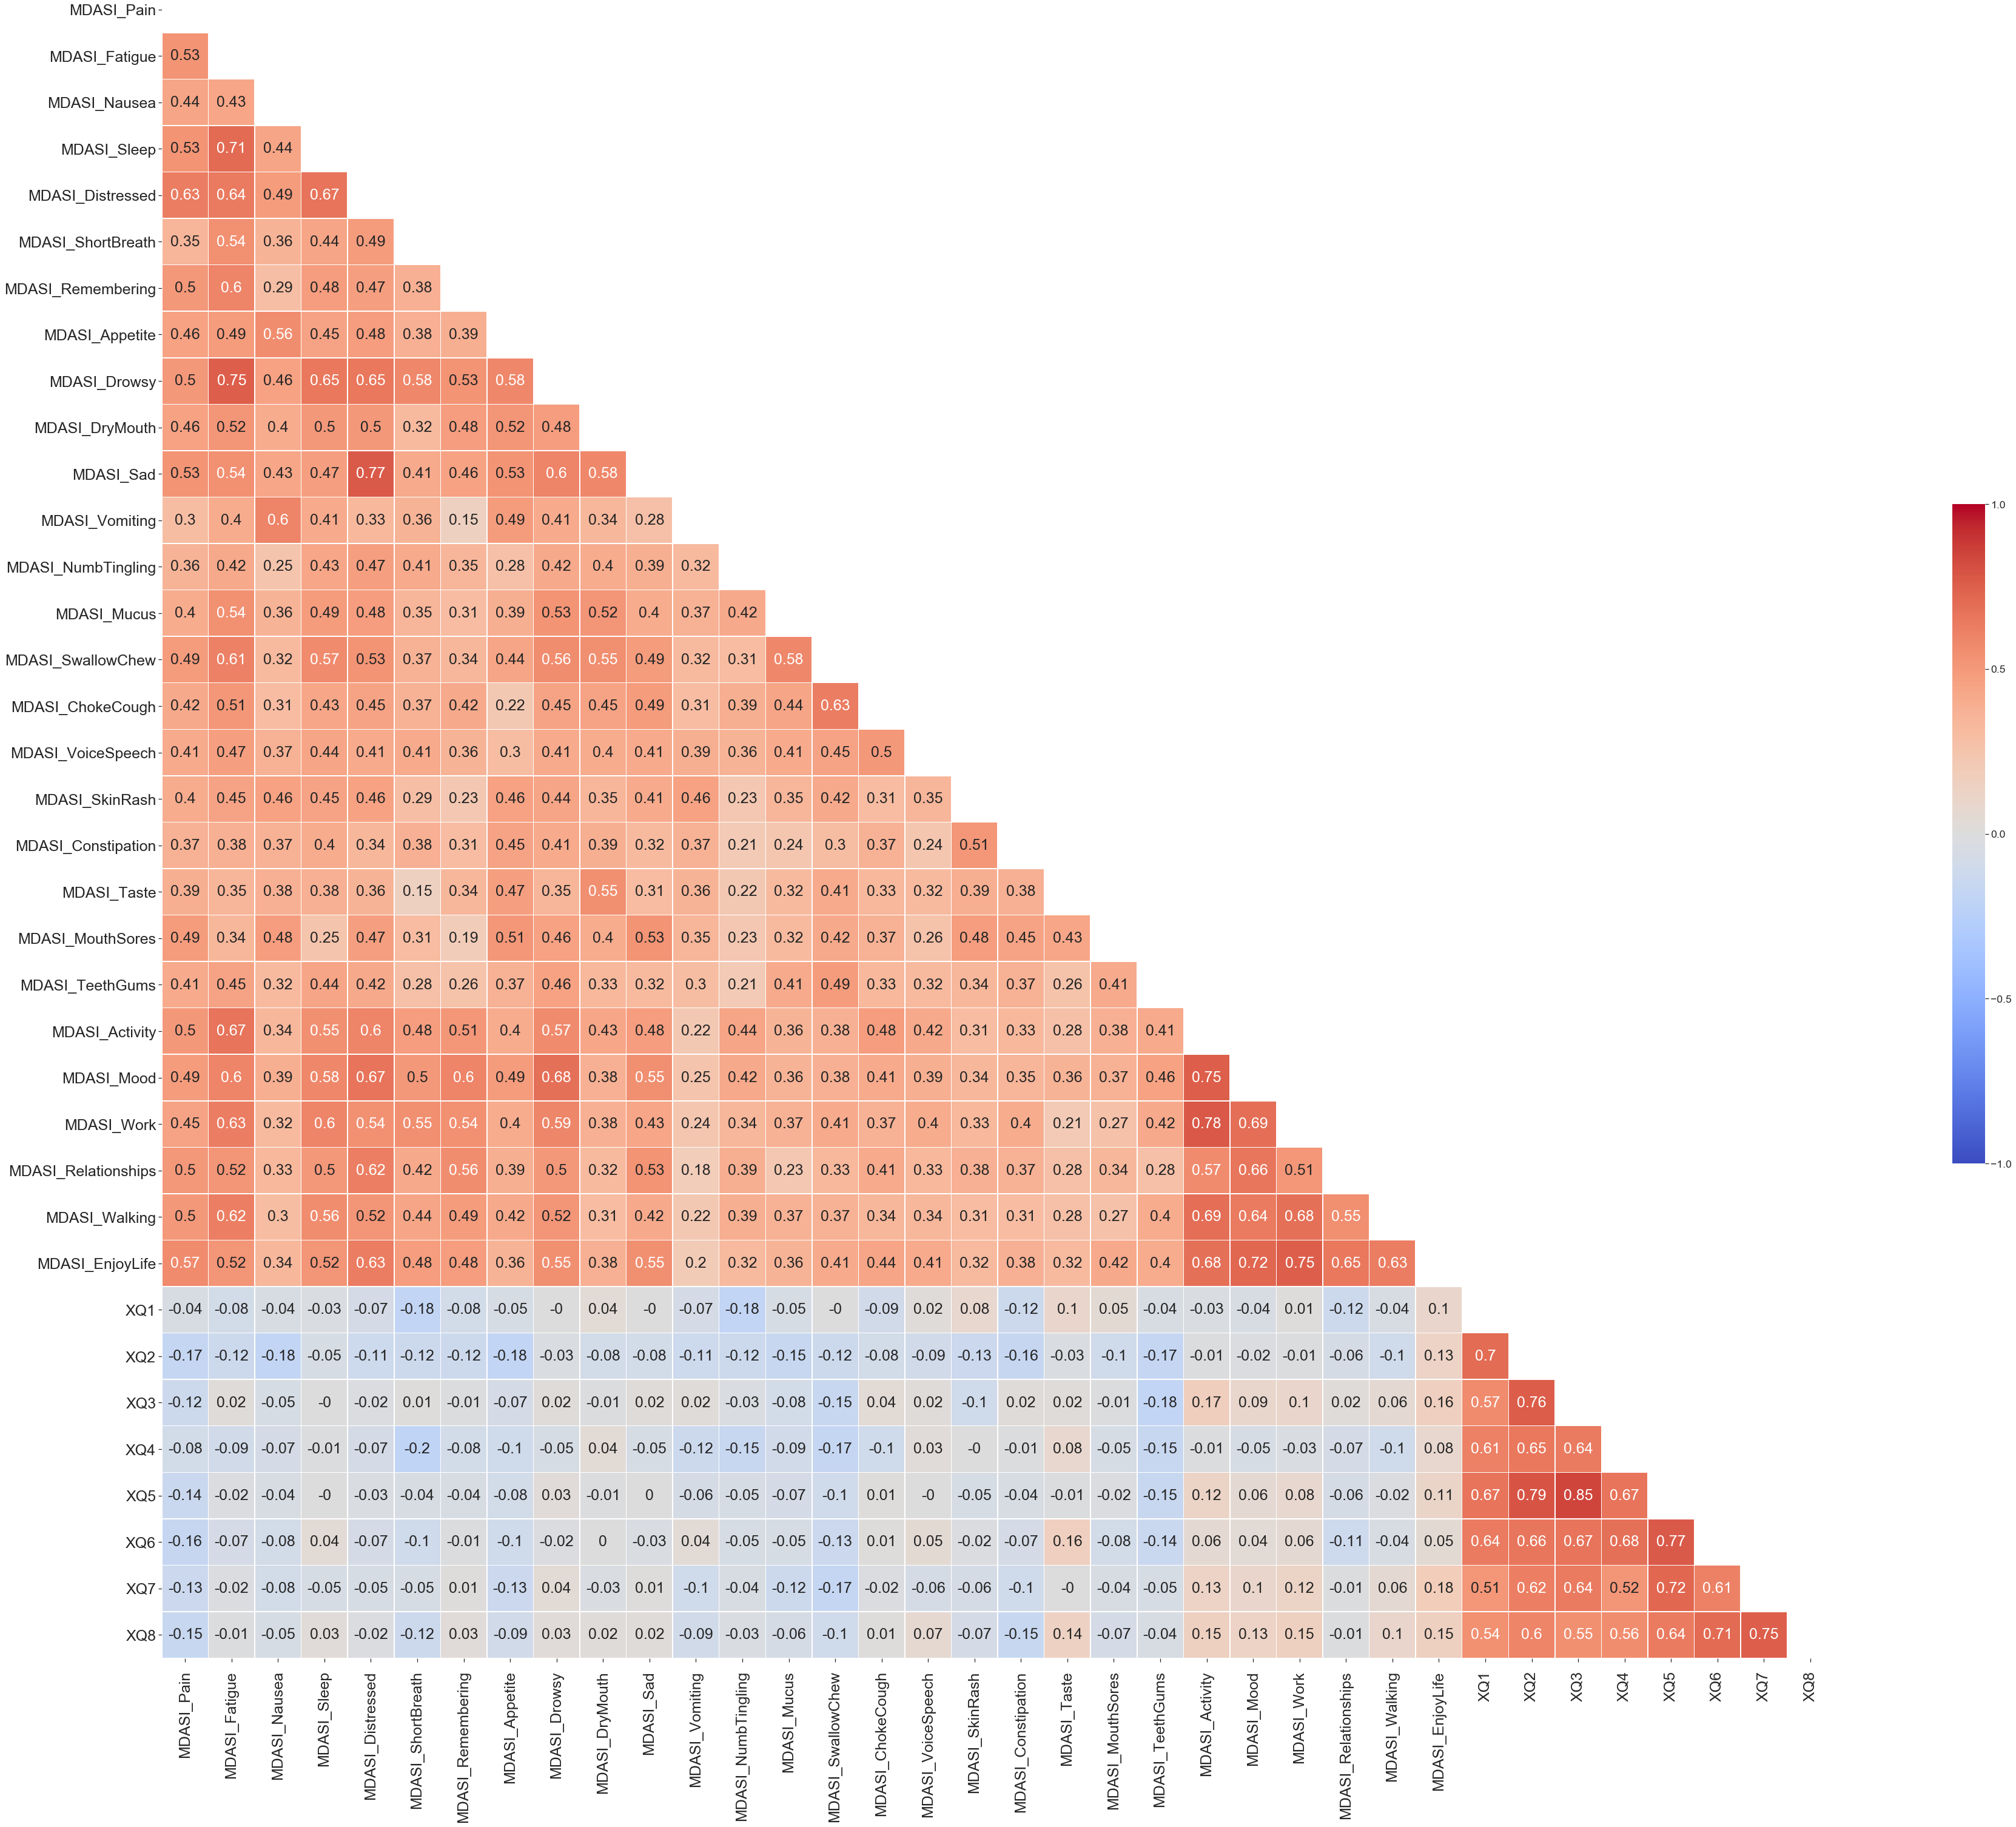

In [210]:
# Plot correlation matrix with heatmap
fig, ax = plt.subplots(figsize=(70, 50))

heatmap = sns.heatmap(MSIvXQ_corr.round(2),
                      square = True,
                      linewidths = .5,
                      cmap ='coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 25})

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Add the column names as labels and change size.
ax.set_yticklabels(MSIvXQ_corr.columns, rotation = 0, size=25)
ax.set_xticklabels(MSIvXQ_corr.columns, size=25)
ax.tick_params(axis='x', which='major', pad=15)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [211]:
# Sort the correlation matrix highest to lowest keeping only values >= 0.5
cm = MSIvXQ_corr[abs(MSIvXQ_corr) >= 0.5].stack().reset_index()
cm.sort_values(by=[0], ascending=False)

level_0              level_1      0
98                   XQ5                  XQ3  0.851
97                   XQ5                  XQ2  0.791
60            MDASI_Work       MDASI_Activity  0.776
104                  XQ6                  XQ5  0.771
22             MDASI_Sad     MDASI_Distressed  0.767
92                   XQ3                  XQ2  0.761
10          MDASI_Drowsy        MDASI_Fatigue  0.754
117                  XQ8                  XQ7  0.753
53            MDASI_Mood       MDASI_Activity  0.748
87       MDASI_EnjoyLife           MDASI_Work  0.748
109                  XQ7                  XQ5  0.725
86       MDASI_EnjoyLife           MDASI_Mood  0.721
2            MDASI_Sleep        MDASI_Fatigue  0.709
116                  XQ8                  XQ6  0.709
90                   XQ2                  XQ1  0.695
61            MDASI_Work           MDASI_Mood  0.694
75         MDASI_Walking       MDASI_Activity  0.686
77         MDASI_Walking           MDASI_Work  0.683
51            MDASI_Mood         MDASI_Drowsy  0.680
103                  XQ6                  XQ4  0.679
85       MDASI_EnjoyLife       MDASI_Activity  0.677
5       MDASI_Distressed          MDASI_Sleep  0.674
99                   XQ5                  XQ4  0.674
102                  XQ6                  XQ3  0.673
49            MDASI_Mood     MDASI_Distressed  0.668
42        MDASI_Activity        MDASI_Fatigue  0.667
96                   XQ5                  XQ1  0.666
68   MDASI_Relationships           MDASI_Mood  0.665
101                  XQ6                  XQ2  0.659
94                   XQ4                  XQ2  0.653
11          MDASI_Drowsy          MDASI_Sleep  0.652
12          MDASI_Drowsy     MDASI_Distressed  0.652
88       MDASI_EnjoyLife  MDASI_Relationships  0.648
76         MDASI_Walking           MDASI_Mood  0.645
115                  XQ8                  XQ5  0.643
95                   XQ4                  XQ3  0.642
100                  XQ6                  XQ1  0.641
4       MDASI_Distressed        MDASI_Fatigue  0.641
107                  XQ7                  XQ3  0.639
3       MDASI_Distressed           MDASI_Pain  0.634
82       MDASI_EnjoyLife     MDASI_Distressed  0.631
37      MDASI_ChokeCough    MDASI_SwallowChew  0.631
89       MDASI_EnjoyLife        MDASI_Walking  0.630
54            MDASI_Work        MDASI_Fatigue  0.626
64   MDASI_Relationships     MDASI_Distressed  0.623
106                  XQ7                  XQ2  0.620
71         MDASI_Walking        MDASI_Fatigue  0.619
93                   XQ4                  XQ1  0.612
30     MDASI_SwallowChew        MDASI_Fatigue  0.610
110                  XQ7                  XQ6  0.609
7      MDASI_Remembering        MDASI_Fatigue  0.604
26        MDASI_Vomiting         MDASI_Nausea  0.604
44        MDASI_Activity     MDASI_Distressed  0.603
47            MDASI_Mood        MDASI_Fatigue  0.603
24             MDASI_Sad         MDASI_Drowsy  0.603
55            MDASI_Work          MDASI_Sleep  0.602
112                  XQ8                  XQ2  0.599
50            MDASI_Mood    MDASI_Remembering  0.599
59            MDASI_Work         MDASI_Drowsy  0.589
48            MDASI_Mood          MDASI_Sleep  0.582
35     MDASI_SwallowChew          MDASI_Mucus  0.582
15          MDASI_Drowsy       MDASI_Appetite  0.581
13          MDASI_Drowsy    MDASI_ShortBreath  0.577
25             MDASI_Sad       MDASI_DryMouth  0.576
31     MDASI_SwallowChew          MDASI_Sleep  0.575
91                   XQ3                  XQ1  0.573
79       MDASI_EnjoyLife           MDASI_Pain  0.570
46        MDASI_Activity         MDASI_Drowsy  0.568
67   MDASI_Relationships       MDASI_Activity  0.567
33     MDASI_SwallowChew         MDASI_Drowsy  0.564
8         MDASI_Appetite         MDASI_Nausea  0.561
65   MDASI_Relationships    MDASI_Remembering  0.561
72         MDASI_Walking          MDASI_Sleep  0.559
114                  XQ8                  XQ4  0.555
57            MDASI_Work    MDASI_ShortBre

### MDADI vs XQ Correlations

In [212]:
# Data is not normalized when comparing individual items between surveys.
MDADIvXQ = pd.concat([MDADI.loc[:, 'MDADI1':'MDADI20'], XQ.loc[:, 'XQ1':'XQ8']], axis=1)
# Get a list of correlations in MDADIvXQ, convert to upper triangular, removing redundant values.
MDIvXQ_corr = MDADIvXQ.corr(method='spearman').round(3)
MDIvXQ_corr = MDIvXQ_corr.mask(np.triu(np.ones(MDIvXQ_corr.shape)).astype(np.bool))
MDIvXQ_corr

MDADI1  MDADI2  MDADI3  MDADI4  MDADI5  MDADI6  MDADI7  MDADI8  \
MDADI1      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
MDADI2    0.613     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
MDADI3    0.555   0.629     NaN     NaN     NaN     NaN     NaN     NaN   
MDADI4    0.693   0.538   0.478     NaN     NaN     NaN     NaN     NaN   
MDADI5    0.049   0.067  -0.013  -0.100     NaN     NaN     NaN     NaN   
MDADI6    0.726   0.644   0.561   0.650  -0.030     NaN     NaN     NaN   
MDADI7    0.703   0.620   0.515   0.588  -0.042   0.797     NaN     NaN   
MDADI8    0.605   0.711   0.677   0.470   0.047   0.647   0.639     NaN   
MDADI9    0.669   0.682   0.576   0.553  -0.034   0.635   0.621   0.744   
MDADI10   0.488   0.475   0.535   0.461  -0.148   0.580   0.636   0.434   
MDADI11   0.458   0.436   0.553   0.437  -0.093   0.483   0.432   0.575   
MDADI12   0.598   0.626   0.646   0.510  -0.010   0.612   0.626   0.705   
MDADI13   0.506   0.544   0.474   0.506  -0.116   0.599   0.654   0.562   
MDADI14   0.667   0.685   0.677   0.566   0.051   0.651   0.614   0.811   
MDADI15   0.409   0.384   0.422   0.326   0.205   0.367   0.297   0.502   
MDADI16   0.425   0.393   0.429   0.355  -0.095   0.467   0.493   0.382   
MDADI17   0.368   0.321   0.319   0.344  -0.029   0.407   0.402   0.308   
MDADI18   0.358   0.376   0.334   0.278  -0.102   0.359   0.407   0.378   
MDADI19   0.239   0.262   0.318   0.252  -0.075   0.202   0.264   0.315   
MDADI20   0.433   0.431   0.361   0.237  -0.082   0.329   0.337   0.473   
XQ1       0.500   0.392   0.418   0.456  -0.005   0.517   0.472   0.401   
XQ2       0.540   0.422   0.460   0.439   0.012   0.427   0.520   0.425   
XQ3       0.591   0.409   0.473   0.460   0.015   0.459   0.520   0.399   
XQ4       0.611   0.416   0.424   0.509  -0.108   0.502   0.508   0.483   
XQ5       0.550   0.405   0.482   0.474  -0.067   0.473   0.489   0.410   
XQ6       0.601   0.463   0.465   0.489  -0.085   0.539   0.554   0.479   
XQ7       0.403   0.292   0.382   0.385   0.005   0.468   0.457   0.323   
XQ8       0.463   0.306   0.423   0.422   0.016   0.450   0.417   0.389   

         MDADI9  MDADI10  MDADI11  MDADI12  MDADI13  MDADI14  MDADI15  \
MDADI1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
MDADI2      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
MDADI3      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
MDADI4      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
MDADI5      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
MDADI6      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
MDADI7      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
MDADI8      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
MDADI9      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
MDADI10   0.320      NaN      NaN      NaN      NaN      NaN      NaN   
MDADI11   0.443    0.579      NaN      NaN      NaN      NaN      NaN   
MDADI12   0.674    0.501    0.612      NaN      NaN      NaN      NaN   
MDADI13   0.621    0.473    0.422    0.595      NaN      NaN      NaN   
MDADI14   0.728    0.470    0.523    0.773    0.622      NaN      NaN   
MDADI15   0.393    0.218    0.366    0.426    0.269    0.575      NaN   
MDADI16   0.318    0.459    0.375    0.403    0.398    0.422    0.228   
MDADI17   0.282    0.308    0.285    0.340    0.314    0.367    0.201   
MDADI18   0.371    0.292    0.312    0.384    0.421    0.360    0.195   
MDADI19   0.261    0.219    0.257    0.332    0.357    0.250    0.111   
MDADI20   0.349    0.338    0.386    0.405    0.365    0.492    0.269   
XQ1       0.453    0.363    0.345    0.394    0.384    0.450    0.243   
XQ2       0.417    0.465    0.459    0.420    0.446    0.465    0.259   
XQ3       0.368    0.517    0.419    0.402    0.437    0.481    0.315   
XQ4       0.475    0.418    0.349    0.393    0.428    0.467    0.217   
XQ5     

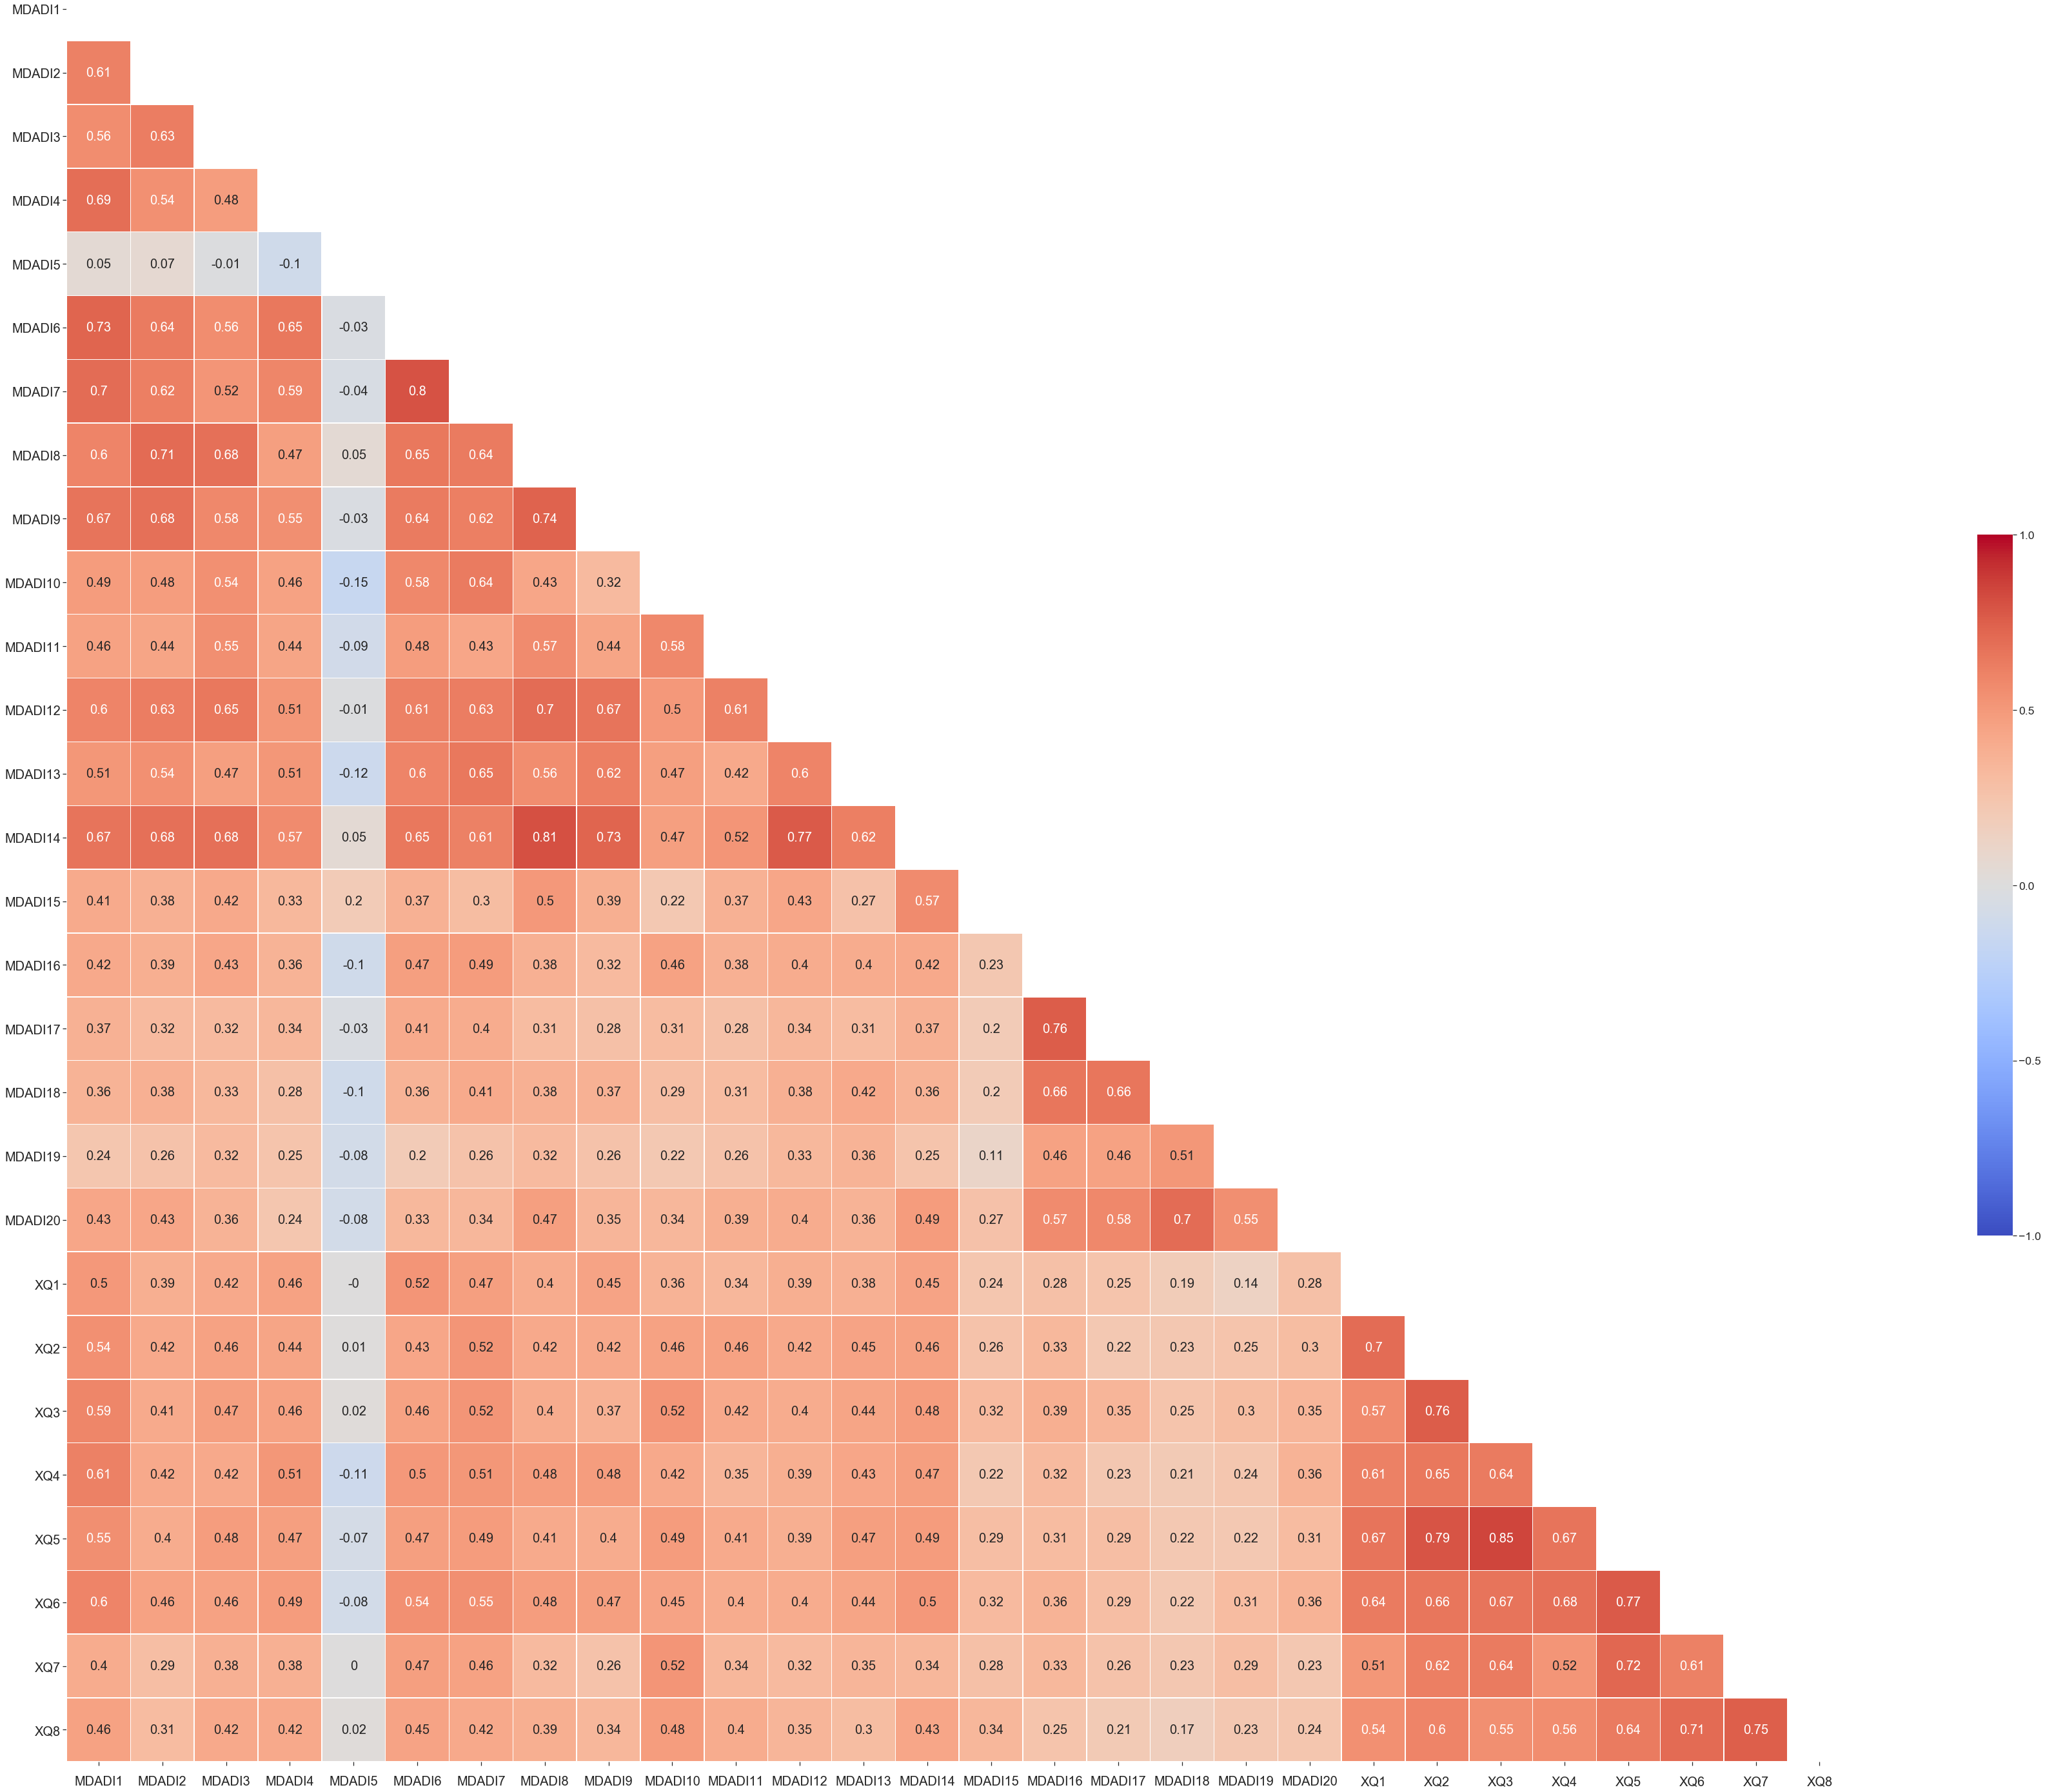

In [213]:
# Plot correlation matrix with heatmap
fig, ax = plt.subplots(figsize=(70, 50))

heatmap = sns.heatmap(MDIvXQ_corr.round(2),
                      square = True,
                      linewidths = .5,
                      cmap ='coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 20})

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Add the column names as labels and change size.
ax.set_yticklabels(MDIvXQ_corr.columns, rotation = 0, size=20)
ax.set_xticklabels(MDIvXQ_corr.columns, size=20)
ax.tick_params(axis='x', which='major', pad=15)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [44]:
# Sort the correlation matrix highest to lowest
cm = MDIvXQ_corr[abs(MDIvXQ_corr) >= 0.5].stack().reset_index()
cm.sort_values(by=[0], ascending=False)

level_0  level_1      0
91       XQ5      XQ3  0.851
56   MDADI14   MDADI8  0.811
13    MDADI7   MDADI6  0.797
90       XQ5      XQ2  0.791
59   MDADI14  MDADI12  0.773
101      XQ6      XQ5  0.771
80       XQ3      XQ2  0.761
63   MDADI17  MDADI16  0.758
115      XQ8      XQ7  0.753
25    MDADI9   MDADI8  0.744
57   MDADI14   MDADI9  0.728
5     MDADI6   MDADI1  0.726
107      XQ7      XQ5  0.725
15    MDADI8   MDADI2  0.711
114      XQ8      XQ6  0.709
38   MDADI12   MDADI8  0.705
9     MDADI7   MDADI1  0.703
69   MDADI20  MDADI18  0.697
75       XQ2      XQ1  0.695
3     MDADI4   MDADI1  0.693
51   MDADI14   MDADI2  0.685
20    MDADI9   MDADI2  0.682
100      XQ6      XQ4  0.679
52   MDADI14   MDADI3  0.677
16    MDADI8   MDADI3  0.677
39   MDADI12   MDADI9  0.674
92       XQ5      XQ4  0.674
99       XQ6      XQ3  0.673
19    MDADI9   MDADI1  0.669
50   MDADI14   MDADI1  0.667
89       XQ5      XQ1  0.666
64   MDADI18  MDADI16  0.665
98       XQ6      XQ2  0.659
65   MDADI18  MDADI17  0.655
46   MDADI13   MDADI7  0.654
86       XQ4      XQ2  0.653
54   MDADI14   MDADI6  0.651
8     MDADI6   MDADI4  0.650
17    MDADI8   MDADI6  0.647
34   MDADI12   MDADI3  0.646
6     MDADI6   MDADI2  0.644
113      XQ8      XQ5  0.643
87       XQ4      XQ3  0.642
97       XQ6      XQ1  0.641
18    MDADI8   MDADI7  0.639
105      XQ7      XQ3  0.639
28   MDADI10   MDADI7  0.636
23    MDADI9   MDADI6  0.635
2     MDADI3   MDADI2  0.629
37   MDADI12   MDADI7  0.626
33   MDADI12   MDADI2  0.626
60   MDADI14  MDADI13  0.622
48   MDADI13   MDADI9  0.621
24    MDADI9   MDADI7  0.621
10    MDADI7   MDADI2  0.620
104      XQ7      XQ2  0.620
55   MDADI14   MDADI7  0.614
0     MDADI2   MDADI1  0.613
36   MDADI12   MDADI6  0.612
85       XQ4      XQ1  0.612
41   MDADI12  MDADI11  0.612
81       XQ4   MDADI1  0.611
108      XQ7      XQ6  0.609
14    MDADI8   MDADI1  0.605
93       XQ6   MDADI1  0.601
45   MDADI13   MDADI6  0.599
110      XQ8      XQ2  0.599
32   MDADI12   MDADI1  0.598
49   MDADI13  MDADI12  0.595
76       XQ3   MDADI1  0.591
12    MDADI7   MDADI4  0.588
27   MDADI10   MDADI6  0.580
31   MDADI11  MDADI10  0.579
68   MDADI20  MDADI17  0.577
21    MDADI9   MDADI3  0.576
30   MDADI11   MDADI8  0.575
62   MDADI15  MDADI14  0.575
79       XQ3      XQ1  0.573
67   MDADI20  MDADI16  0.569
53   MDADI14   MDADI4  0.566
47   MDADI13   MDADI8  0.562
7     MDADI6   MDADI3  0.561
112      XQ8      XQ4  0.555
1     MDADI3   MDADI1  0.555
95       XQ6   MDADI7  0.554
22    MDADI9   MDADI4  0.553
29   MDADI11   MDADI3  0.553
88       XQ5   MDADI1  0.550
70   MDADI20  MDADI19  0.549
111      XQ8      XQ3  0.547
43   MDADI13   MDADI2  0.544
73       XQ2   MDADI1  0.540
94       XQ6   MDADI6  0.539
4     MDADI4   MDADI2  0.538
109      XQ8      XQ1  0.535
26   MDADI10   MDADI3  0.535
58   MDADI14  MDADI11  0.523
102      XQ7  MDADI10  0.522
77       XQ3   MDADI7  0.520
74       XQ2   MDADI7  0.520
106      XQ7      XQ4  0.519
72       XQ1   MDADI6  0.517
78       XQ3  MDADI10  0.517
11    MDADI7   MDADI3  0.515
35   MDADI12   MDADI4  0.510
82       XQ4   MDADI4  0.509
66   MDADI19  MDADI18  0.509
84       XQ4   MDADI7  0.508
103      XQ7      XQ1  0.506
42   MDADI13   MDADI1  0.506
44   MDADI13   MDADI4  0.506
96       XQ6  MDADI14  0.504
83       XQ4   MDADI6  0.502
61   MDADI15   MDADI8  0.502
40   MDADI12  MDADI10  0.501
71       XQ1   MDADI1  0.500

# Categorical Correlations

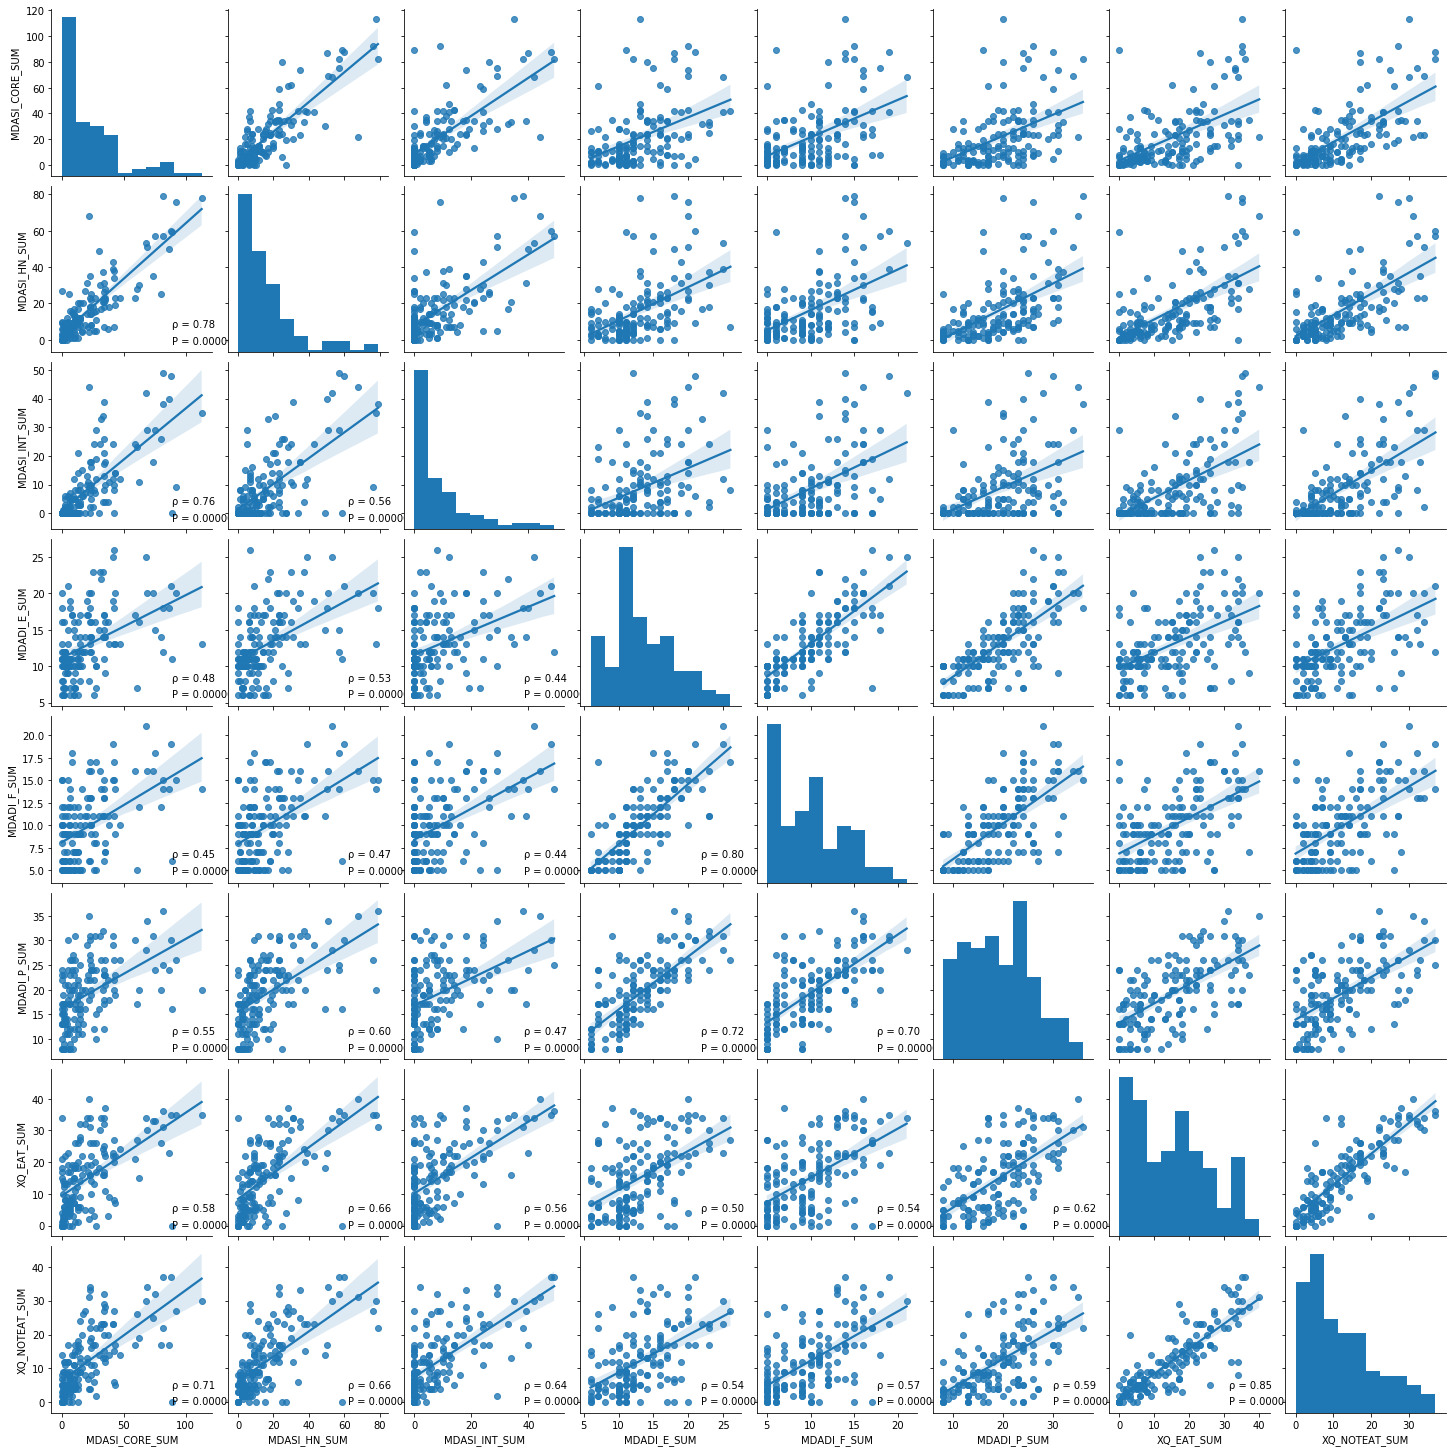

In [45]:
from scipy.stats import pearsonr, spearmanr #person linear, spearman non-linear. Spearman used in Tyler paper. 
g = sns.pairplot(category_sums, kind='reg', palette="Set2")
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the bottom right hand corner of a plot."""
    r, p = spearmanr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.75, .15), xycoords=ax.transAxes)
    ax.annotate(f'P = {p:.6f}', xy=(.75, .05), xycoords=ax.transAxes)
#     ax.annotate('p < 0.001', xy=(.1, .8), xycoords=ax.transAxes)

g.map_lower(corrfunc)
plt.show()

Shaded area is 95% confidence interval
Histogram distributions from ablove plot show skewed data, therefore nonparametric statistics are relevant. 

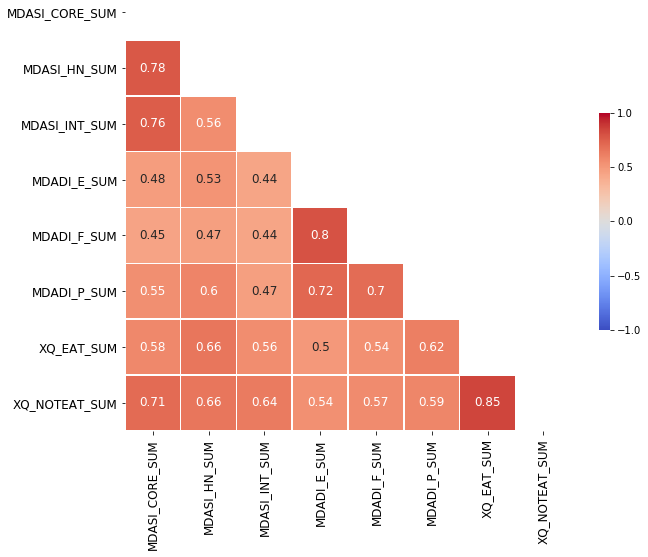

In [46]:
category_sums_corr = category_sums.corr(method='spearman').round(3)
category_sums_corr = category_sums_corr.mask(np.triu(np.ones(category_sums_corr.shape)).astype(np.bool))
# Plot correlation matrix with heatmap
fig, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(category_sums_corr.round(2),
                      square = True,
                      linewidths = .5,
                      cmap ='coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Add the column names as labels and change size.
ax.set_yticklabels(category_sums_corr.columns, rotation = 0, size=12)
ax.set_xticklabels(category_sums_corr.columns, size=12)
ax.tick_params(axis='x', which='major', pad=5)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Why do categorical scores correlate with MDASI but there is no correlation to individual items? 

# Heatmaps

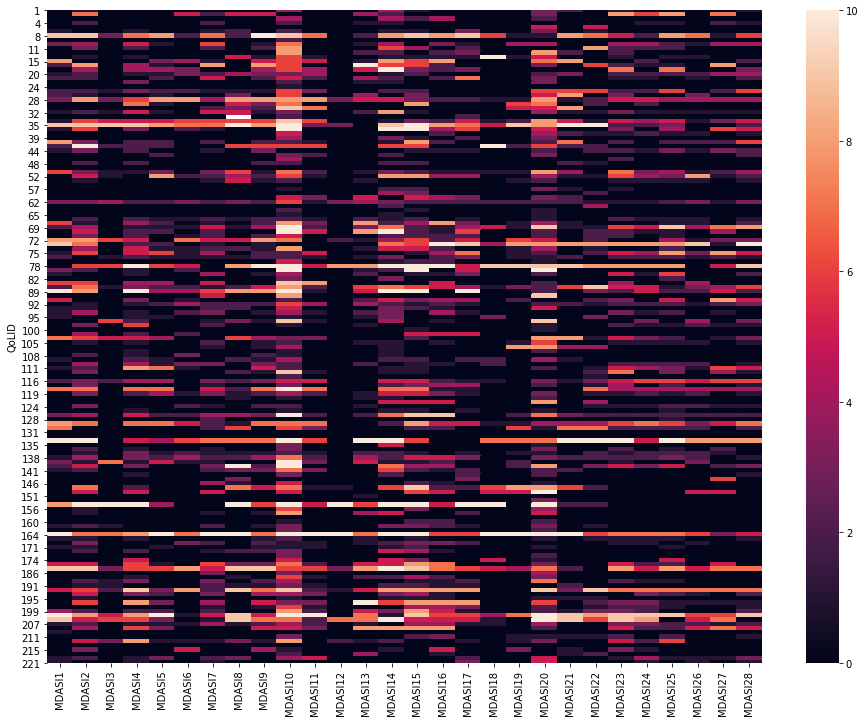

In [47]:
fig = plt.figure(figsize=(16,12))
sns.heatmap(MDASI.loc[:, "MDASI1":"MDASI28"])

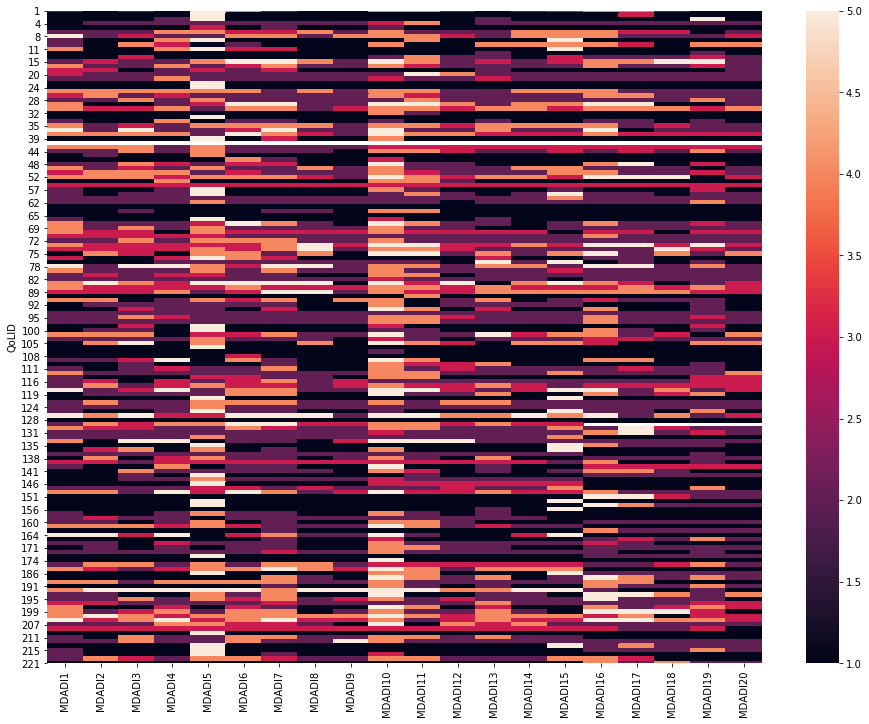

In [48]:
fig = plt.figure(figsize=(16,12))
sns.heatmap(MDADI.iloc[:, 0:20])

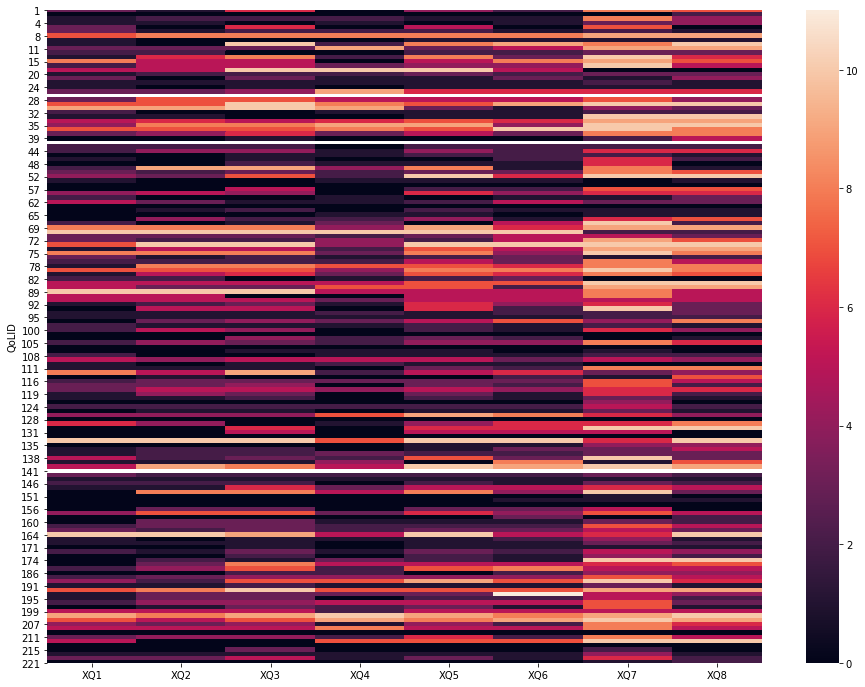

In [49]:
fig = plt.figure(figsize=(16,12))
sns.heatmap(XQ.iloc[:, 0:8])

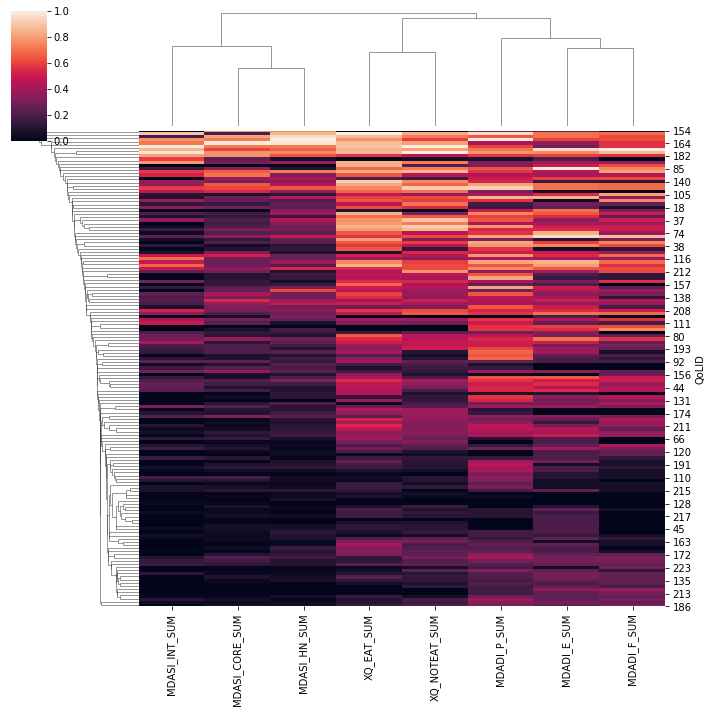

In [50]:
# fig = plt.figure(figsize=(16,12))
sns.clustermap(category_sums, metric="euclidean", standard_scale=1, method="single")

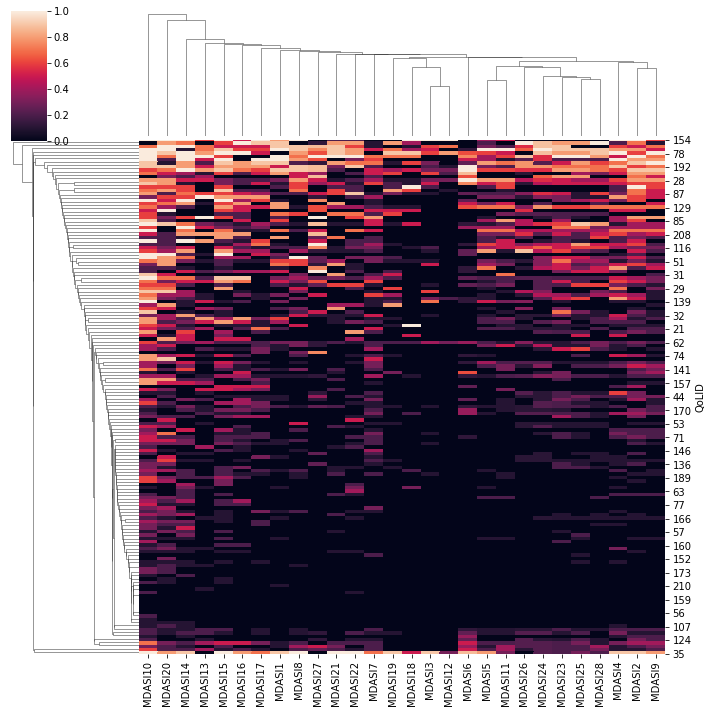

In [51]:
sns.clustermap(MDASI.dropna().iloc[:, :28], metric="euclidean", standard_scale=1, method="single")

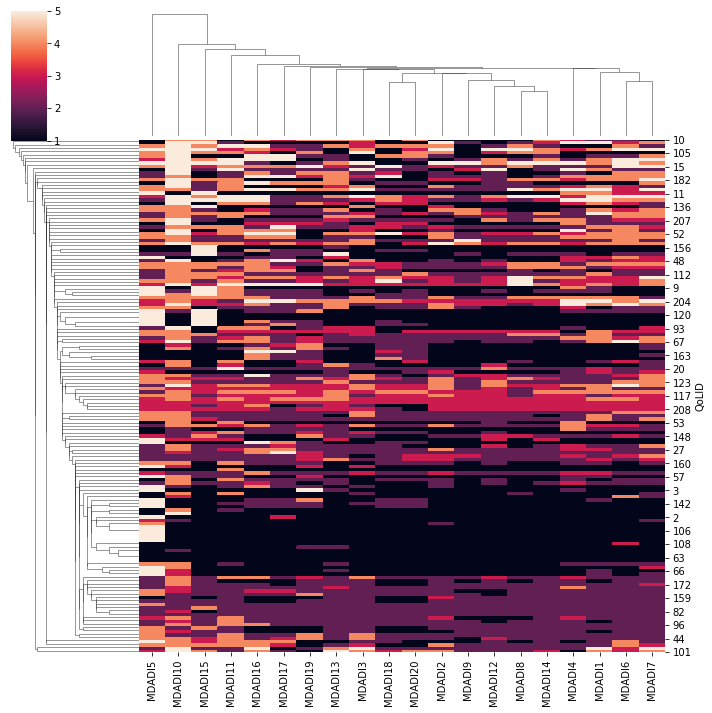

In [52]:
# sns.clustermap(MDADI.dropna().iloc[:, 0:20], metric="euclidean", standard_scale=1, method="single")
sns.clustermap(MDADI.dropna().iloc[:, 0:20], metric="euclidean", method="single", figsize=(10, 10))

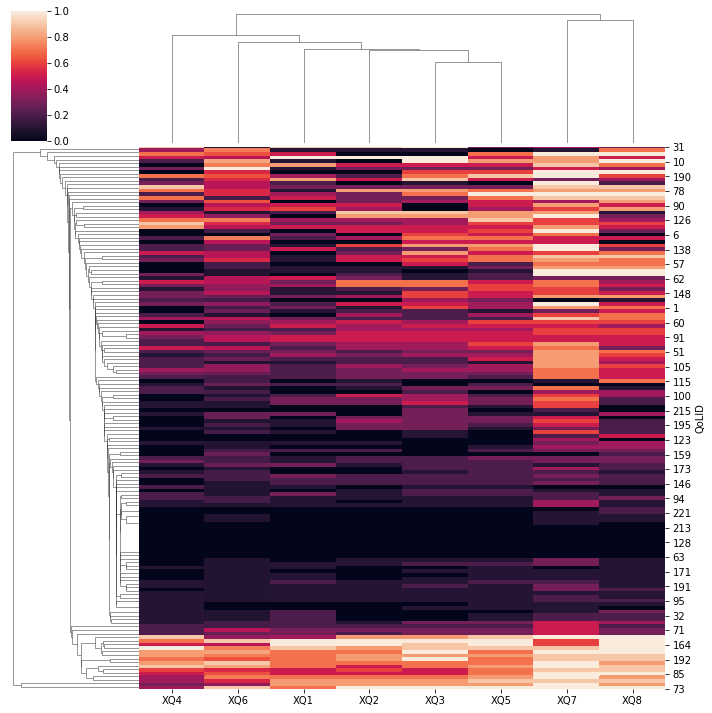

In [53]:
sns.clustermap(XQ.dropna().iloc[:, 0:8], metric="euclidean", standard_scale=1, method="single")

# Mann-Whitney tests. How similar are the populations?

From PRO paper:<br>
PRO responses were divided into none/mild vs. moderate/severe categories (MDASI-HN responses <5 vs. ≥5; MDADI responses <40 vs. ≥40; XQ responses <50 vs ≥50). Benjamini-Hochberg multiple testing corrections controlled the false discovery rate.

### Mann-Whitney on Survey totals

In [54]:
stat, p = mannwhitneyu(MDASI['MDASI_TOTAL_SUM'], MDADI['MDADI_TOTAL_SUM'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=9418.000, p=0.001
Different distribution (reject H0)


In [55]:
stat, p = mannwhitneyu(MDASI['MDASI_TOTAL_SUM'], XQ['XQ_TOTAL_SUM'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=10139.500, p=0.009
Different distribution (reject H0)


In [56]:
stat, p = mannwhitneyu(MDADI['MDADI_TOTAL_SUM'], XQ['XQ_TOTAL_SUM'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=6150.000, p=0.000
Different distribution (reject H0)


### Mann-Whitney on Categories

### Perform Mann-Whitney U test to identify if the samples are drawn from the same distribution

In [166]:
stat, p = mannwhitneyu(category_sums['MDADI_E_SUM'], category_sums['MDASI_CORE_SUM'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=10979.000, p=0.289
Same distribution (fail to reject H0)


In [58]:
#Get filtered lists of which combinations were rejected or accepted
rejh0 = []
accepth0 = []

for i in range(len(category_sums.columns)):
    category_sums.iloc[:, i]
    for j in range(i+1, len(category_sums.columns)):
        stat, p = mannwhitneyu(category_sums.iloc[:, i], category_sums.iloc[:, j])
        p_values[i][j] = p
#         print(category_sums.columns[i], 'vs', category_sums.columns[j])
        alpha = 0.05
        if p > alpha:
            str = category_sums.columns[i] + ' vs ' + category_sums.columns[j]
            accepth0.append(str)
#             print('Same distribution (fail to reject H0) \n')
        else:
            str = category_sums.columns[i] + ' vs ' + category_sums.columns[j]
            rejh0.append(str)
#             print('Different distribution (reject H0)\n')

In [59]:
# Rejected h0
rejh0

['MDASI_CORE_SUM vs MDASI_INT_SUM',
 'MDASI_CORE_SUM vs MDADI_F_SUM',
 'MDASI_CORE_SUM vs MDADI_P_SUM',
 'MDASI_CORE_SUM vs XQ_NOTEAT_SUM',
 'MDASI_HN_SUM vs MDASI_INT_SUM',
 'MDASI_HN_SUM vs MDADI_E_SUM',
 'MDASI_HN_SUM vs MDADI_P_SUM',
 'MDASI_INT_SUM vs MDADI_E_SUM',
 'MDASI_INT_SUM vs MDADI_F_SUM',
 'MDASI_INT_SUM vs MDADI_P_SUM',
 'MDASI_INT_SUM vs XQ_EAT_SUM',
 'MDASI_INT_SUM vs XQ_NOTEAT_SUM',
 'MDADI_E_SUM vs MDADI_F_SUM',
 'MDADI_E_SUM vs MDADI_P_SUM',
 'MDADI_E_SUM vs XQ_NOTEAT_SUM',
 'MDADI_F_SUM vs MDADI_P_SUM',
 'MDADI_F_SUM vs XQ_EAT_SUM',
 'MDADI_P_SUM vs XQ_EAT_SUM',
 'MDADI_P_SUM vs XQ_NOTEAT_SUM',
 'XQ_EAT_SUM vs XQ_NOTEAT_SUM']

In [60]:
# Fail to reject h0
accepth0

['MDASI_CORE_SUM vs MDASI_HN_SUM',
 'MDASI_CORE_SUM vs MDADI_E_SUM',
 'MDASI_CORE_SUM vs XQ_EAT_SUM',
 'MDASI_HN_SUM vs MDADI_F_SUM',
 'MDASI_HN_SUM vs XQ_EAT_SUM',
 'MDASI_HN_SUM vs XQ_NOTEAT_SUM',
 'MDADI_E_SUM vs XQ_EAT_SUM',
 'MDADI_F_SUM vs XQ_NOTEAT_SUM']

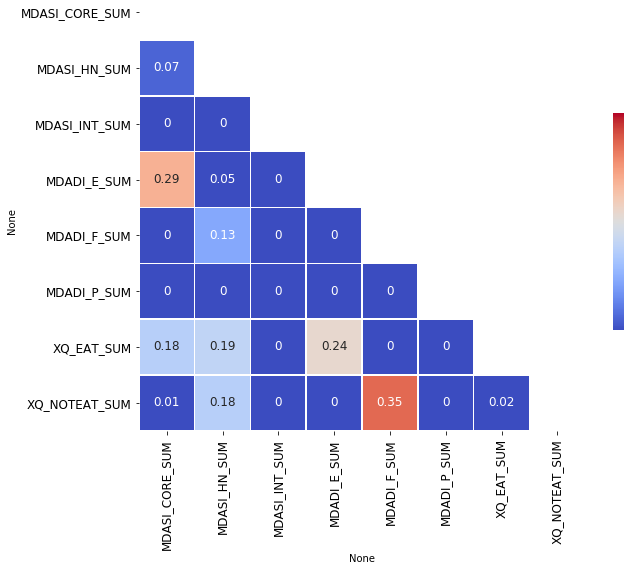

In [61]:
p_table = pd.DataFrame(p_values, columns=[category_sums.columns], index=[category_sums.columns])
p_table = p_table.mask(np.triu(np.ones(p_table.shape)).astype(np.bool))
# Plot correlation matrix with heatmap
fig, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(p_table.round(2),
                      square = True,
                      linewidths = .5,
                      cmap ='coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = 0.05,
                      vmax = 0.4,
                      annot = True,
                      annot_kws = {'size': 12})

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottomm
# t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Add the column names as labels and change size.
ax.set_yticklabels(category_sums_corr.columns, rotation = 0, size=12)
ax.set_xticklabels(category_sums_corr.columns, size=12)
ax.tick_params(axis='x', which='major', pad=5)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

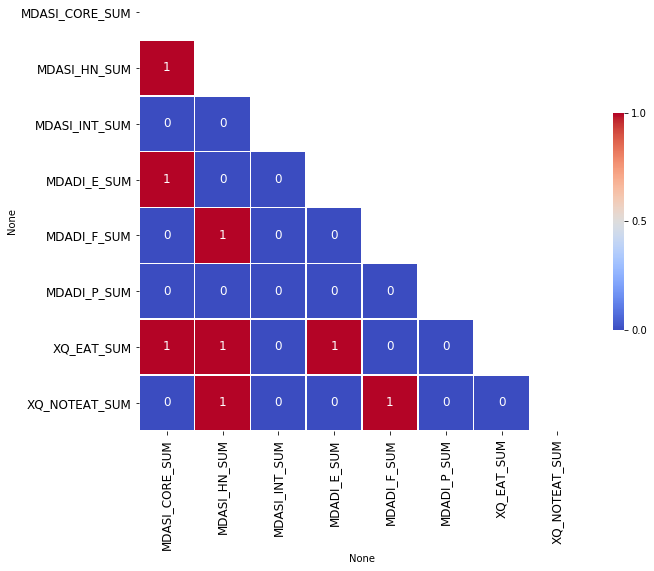

In [62]:
# Plot a heatmap of the decision to accept or reject the null hypothesis. 
acc_rej = p_table >= 0.05 #fail to reject h0 (accept they are the same distribution)
acc_rej = acc_rej.mask(np.triu(np.ones(acc_rej.shape)).astype(np.bool))
# Plot correlation matrix with heatmap
fig, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(acc_rej,
                      square = True,
                      linewidths = .5,
                      cmap ='coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = 0,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottomm
# t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Add the column names as labels and change size.
ax.set_yticklabels(category_sums_corr.columns, rotation = 0, size=12)
ax.set_xticklabels(category_sums_corr.columns, size=12)
ax.tick_params(axis='x', which='major', pad=5)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Red squares represent equal distributions. Should report these with significance values.

## Other Questions We Can Ask
Use Logistic Regression to predict category response from individual questions in other surveys?<br>
Lasso logistic regression to eliminate redundant questions?<br>
Do patients who score high on one questionnaire score high on others?<br>
Whate are the most deterministic factors which indicate poor QoL response?<br>
Use decision trees to predict response on one instrument given the other two (which scores would be most beneficial to predict, from which survey?)<br>